# In-Depth Exploratory Analysis and Visualizations - Avito

Avito is the Russia’s largest classified advertisements website. Sellers on their platform sometimes feel frustrated with both too little demand (indicating something is wrong with the product or the product listing) or too much demand (indicating a hot item with a good description was underpriced). 

In this [competition](https://www.kaggle.com/c/avito-demand-prediction), the aim is to predict demand for an online advertisement based on its full description (title, description, images, etc.), its context (geographically where it was posted, similar ads already posted) and historical demand for similar ads in similar contexts. With this information, Avito can inform sellers on how to best optimize their listing and provide some indication of how much interest they should realistically expect to receive.

In this notebook, I have analysed the dataset shared by Avito and prepared visualizations to understand it better. 

## Contents

[1. Dataset Preparation](#1)  
[2. Feature Engineering](#2)  
[3. Translating Columns](#3)  
[4. Dataset Snapshot](#4)  
&nbsp; &nbsp;&nbsp; &nbsp; [4.1. Snapshot of Training Data](#4-1)  
&nbsp; &nbsp;&nbsp; &nbsp; [4.2 Snapshot of Training Periods Data](#4-2)  
[5. Understanding the Variable Distributions](#5)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.1 What is the Distribution of Deal Probability](#5-1)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.2 Deal Probability Bins](#5-2)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.3 Distribution of Parent Category](#5-3)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.4 Distribution of Category](#5-4)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.5 Regions and their Item Counts](#5-5)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.6 Visualizing the Regions on Map](#5-6)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.7 Visualizing the Cities on Map](#5-7)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.8 Cities and their item counts](#5-8)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.9 Param_1, Param_2, Param_3 distributions](#5-9)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.10 Month Day and Week Day - Number of Items](#5-10)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.11 Title Word Count, Description Word Count and their distributions](#5-11)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.12 Image Top1 and User Id](5-12)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.13 Distribution of User Type](#5-13)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.14 For how much Days ads are run](#5-14)  
&nbsp; &nbsp;&nbsp; &nbsp; [5.15 Top brands present in the title](#5-15)  
[6. Multi Variate Analysis](#6)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.1 Correlation among the variables](#6-1)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.2 Deal Probability by Parent Category and User Type ](#6-2)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.3 Deal Probability by Region and User Type](#6-3)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.4 How many items are there under different Parent Category and different Deal Class](#6-4)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.5 Items from different Regions and Different Deal Probability](#6-5)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.6 Different Regions and the mean price of items having different deal probability](#6-6)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.7 What is the Mean Price of Items having different Deal Probability and Parent Category](#6-7)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.8 Deal Class values on different Week Days and their Mean Price](#6-8)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.9 Different Regions, Different Day of the Week and Value of Mean Price of Items](#6-9)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.10 Week Day and Region vise Value of Max Price of Items](#6-10)  
&nbsp; &nbsp;&nbsp; &nbsp; [6.11 Max value of Deal Proabability by different Regions and Day of the Week](#6-11)  
[7. Charateristics of Items having High or Low Mean Price](#7)  
&nbsp; &nbsp;&nbsp; &nbsp; [7.1 Mean Price of Items by Week Day and Month Day](#7-1)  
&nbsp; &nbsp;&nbsp; &nbsp; [7.2 Mean price of items by Regions and Cities](#7-2)  
&nbsp; &nbsp;&nbsp; &nbsp; [7.3 Mean Price of Items by Categories and Parent Categories](#7-3)  
&nbsp; &nbsp;&nbsp; &nbsp; [7.4 Mean Price by Count of Words present in Title and Description](#7-4)  
[8. Characteristics of Items having Very High (or Very Low) Deal Percentage](#8)  
&nbsp; &nbsp;&nbsp; &nbsp; [8.1 Words present in the title](#8-1)  
&nbsp; &nbsp;&nbsp; &nbsp; [8.2 Comparing all other features of Items with Low and High deal percentages](#8-2)   
&nbsp; &nbsp;&nbsp; &nbsp; [8.3 Top N-grams used in the description of items](#8-3) 



<a id="1"></a>
## 1. Dataset Preparation

In this section, I have included the required libraries and loaded the dataset into memory using pandas

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

train_df = pd.read_csv("./data/train.csv", parse_dates=["activation_date"])
pr_train = pd.read_csv("./data/periods_train.csv", parse_dates=["activation_date", "date_from", "date_to"])
train_act = pd.read_csv("./data/train_active.csv")

In [19]:
pr_train.head()

,item_id,activation_date,date_from,date_to,total_period
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1 days
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3 days
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13 days
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9 days
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13 days


<a id="2"></a>
## 2. Feature Engineering

In this section, I have created additional features using the existing dataset such as:

1. WeekDay - Day of the week when the Ad was activated  
2. Month - Month when the Ad was activated  
3. Month Day - Day of the month when the Ad was activated  
4. Description_len - Total words in the description, ie. the description length
5. Title_len - Total words in the title, ie. the title length  
6. Total Period - total number of days for which the Ad was run  
7. Deal Class - A binary variable which is 1 when the deal probability is greater than 0.5 else 0

In [2]:
## 2. feature engineering 

train_df['weekday'] = train_df.activation_date.dt.weekday
train_df['month'] = train_df.activation_date.dt.month
train_df['day'] = train_df.activation_date.dt.day

train_df['description'] = train_df['description'].fillna(" ")
train_df['description_len'] = train_df['description'].apply(lambda x : len(x.split()))

train_df['title'] = train_df['title'].fillna(" ")
train_df['title_len'] = train_df['title'].apply(lambda x : len(x.split()))

pr_train['total_period'] = pr_train['date_to'] - pr_train['date_from']

daymap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
train_df['weekday_en'] = train_df['weekday'].apply(lambda x : daymap[x])

train_df['deal_class'] = train_df['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")

interval = (-0.99, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.1)
cats = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9','0.9-1.0']
train_df["deal_class_2"] = pd.cut(train_df.deal_probability, interval, labels=cats)

<a id="3"></a>
## 3. Translating Columns

Translating few key columns in the dataset from russian to english language. These ready to use dictionaries are prepared using yandex and SRK's kernel. 

In [3]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

# train_df['city_en'] = train_df['city'].apply(lambda x : region_map[x])
# train_df['param_1_en'] = train_df['param_1'].apply(lambda x : region_map[x])
# train_df['param_2_en'] = train_df['param_2'].apply(lambda x : region_map[x])
# train_df['title_en'] = train_df['title'].apply(lambda x : region_map[x])

In [4]:
train_df['region_en'] = train_df['region'].apply(lambda x : region_map[x])
train_df['parent_category_name_en'] = train_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train_df['category_name_en'] = train_df['category_name'].apply(lambda x : category_map[x])

<a id='4'></a>
## 4. Data Snapshot
<a id="4-1"></a>
### 4.1 Snapshot of Train Data


In [5]:
train_df.head(100)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,month,day,description_len,title_len,weekday_en,deal_class,deal_class_2,region_en,parent_category_name_en,category_name_en
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,3,28,7,3,Mon,<0.5,0.1-0.2,Sverdlovsk oblast,Personal belongings,Children's products and toys
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,3,26,7,3,Sat,<0.5,0-0.1,Samara oblast,For the home and garden,Furniture and interior
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,3,20,17,2,Sun,<0.5,0.4-0.5,Rostov oblast,Consumer electronics,Audio and video
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,3,25,3,1,Fri,>=0.5,0.8-0.9,Tatarstan,Personal belongings,Children's products and toys
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,3,16,4,3,Wed,<0.5,0.2-0.3,Volgograd oblast,Transport,Cars
5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Авто люлька,...,3,28,3,2,Mon,>=0.5,0.8-0.9,Tatarstan,Personal belongings,Children's products and toys
6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,Водонагреватель 100 литров нержавейка плоский,...,3,23,21,5,Wed,<0.5,0-0.1,Nizhny Novgorod oblast,For the home and garden,Repair and construction
7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы,26,Бойфренды colins,...,3,25,4,2,Fri,>=0.5,0.8-0.9,Perm Krai,Personal belongings,"Clothing, shoes, accessories"
8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,> 50 (XXL),Платье,...,3,17,5,1,Thu,<0.5,0-0.1,Orenburg oblast,Personal belongings,"Clothing, shoes, accessories"
9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,25,Полу ботиночки замш натур.Бамбини,...,3,22,11,4,Tue,<0.5,0-0.1,Nizhny Novgorod oblast,Personal belongings,Children's clothing and shoes


In [6]:
train_df.count()

item_id                    1503424
user_id                    1503424
region                     1503424
city                       1503424
parent_category_name       1503424
category_name              1503424
param_1                    1441848
param_2                     848882
param_3                     640859
title                      1503424
description                1503424
price                      1418062
item_seq_number            1503424
activation_date            1503424
user_type                  1503424
image                      1390836
image_top_1                1390836
deal_probability           1503424
weekday                    1503424
month                      1503424
day                        1503424
description_len            1503424
title_len                  1503424
weekday_en                 1503424
deal_class                 1503424
deal_class_2               1503424
region_en                  1503424
parent_category_name_en    1503424
category_name_en    

<a id="4-2"></a>
### 4.2 Snapshot of Train Periods Dataset

In [7]:
pr_train.head()

,item_id,activation_date,date_from,date_to,total_period
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1 days
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3 days
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13 days
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9 days
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13 days


In [8]:
pr_train[pr_train.item_id == 'c4e2543626b0']

,item_id,activation_date,date_from,date_to,total_period


In [9]:
train_df[train_df.item_id == 'a97943ae8158']

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,month,day,description_len,title_len,weekday_en,deal_class,deal_class_2,region_en,parent_category_name_en,category_name_en
14,a97943ae8158,f643d87dd23c,Башкортостан,Туймазы,Животные,Собаки,Немецкая овчарка,NaN,NaN,Продаются щенки немецкой овчарки,...,3,23,6,4,Wed,<0.5,0-0.1,Bashkortostan,Animals,Dogs


In [13]:
pr_train.describe()

,total_period
count,16687412
mean,8 days 20:06:24.683736
std,4 days 11:20:58.819564
min,0 days 00:00:00
25%,5 days 00:00:00
50%,10 days 00:00:00
75%,13 days 00:00:00
max,13 days 00:00:00


In [16]:
pr_items = pr_train.item_id.values
df_items = train_df.item_id.values
result=list(set(pr_items) & set(df_items))
len(result)

0

<a id="5"></a>
## 5. Understanding the variables distributions
<a id="5-1"></a>
### 5.1 What is the distribution of Deal Probability

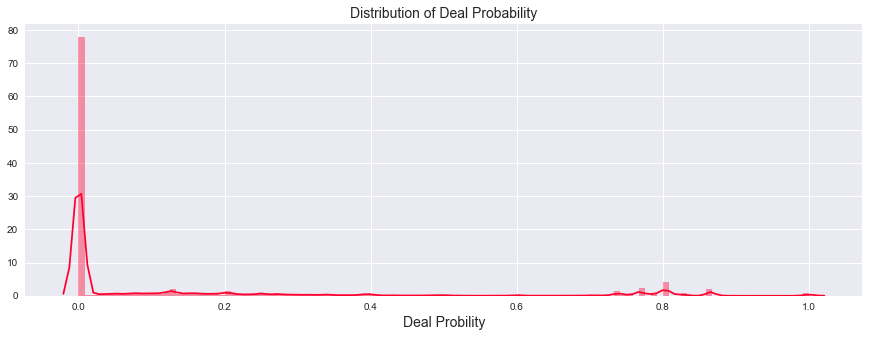

In [10]:
## 1. Deal Probability Distribution
def generate_histogram_plot(df, col, title):
    trace = go.Histogram(x = df[col]) 
    layout = go.Layout(title=title, legend=dict(orientation="h"), height=400)
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)


# generate_histogram_plot(train_df, 'deal_probability', 'Distribution of Deal Probability')
plt.figure(figsize=(15,5))
sns.distplot(train_df["deal_probability"].values, bins=120, color="#ff002e")
plt.xlabel('Deal Probility', fontsize=14);
plt.title("Distribution of Deal Probability", fontsize=14);
plt.show();

**Inference**  
> - From the deal probability distribution graph, it is clear that majority of the items have exteremely low deal probability, ie. about 78%, while very few values have the deal probability of 0.7 or larger.  
> - A very small tower is observed near the deal probability of 1.0, indicating that there are some items in the dataset having very high value of deal probability.  

**Top 10 Items having deal probability  = 1.0 are**     
> - 92013ca1fe79 | Installation of doors, openings, slopes, arches  
> - c6239fc67a6f | Nail extension, correction  
> - 44aa121e4559 | Cargo transportation (long distance), onboard, open  
> - b16d1b27c975 | Rise of houses  
> - fe03dbc60ccf | Transportation across the southern Federal district North Caucasian Federal district Crimea  


<a id="5-2"></a>
### 5.2 Deal Probability Bins !


In [11]:
def _generate_bar_plot_hor(df, col, title, color, w=None, h=None, lm=0, limit=100):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(y=cnt_srs.index[::-1], x=cnt_srs.values[::-1], orientation = 'h',
        marker=dict(color=color))

    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def _generate_bar_plot_ver(df, col, title, color, w=None, h=None, lm=0, limit=100, need_trace = False):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(x=list(cnt_srs.index), y=list(cnt_srs.values),
        marker=dict(color = color))
    if need_trace:
        return trace
    if w != None and h != None:
        layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    else:
        layout = dict(title=title, margin=dict(l=lm))
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

trace1 = _generate_bar_plot_ver(train_df, 'deal_class_2', "Deal Probability Bins", '#7a8aa3', lm=0, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train_df, 'deal_class', "Deal Proabibilities (>0.5 or <= 0.5)", ['#f25771','#93ef51'], 200, limit=30, need_trace = True)

fig = tools.make_subplots(rows=1, cols=3, specs=[[{'colspan': 2}, {},{}]], print_grid=False, subplot_titles = ['Deal Probability Bins','','Deal Proabibilities (>0.5 or <= 0.5)'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 3);

fig['layout'].update(height=400, title='',showlegend=False)
iplot(fig); 

> - There are about 1.3 Million items having deal probability less than 0.5, while there are about 182K items having deal probability greater than 0.5  
> - Most dominant categories are items having deal probability: 0-0.2, 0.8-0.9

<a id="5-3"></a>
### 5.3 Distribution of Parent Category

In [12]:
## univariate analysis of different categorical columns 

cols = ['parent_category_name_en', 'category_name_en', 'region_en', 'city', 'param_1', 'param_2', 'param_3', 'weekday', 'day','title_len', 'description_len', 'image_top_1', 'user_id']
_generate_bar_plot_hor(train_df, cols[0], "Distribution of Parent Category", '#f2b5bc', 600, 400, 200)

> - In this dataset, maximum number of items are present under "Personal Belonging" parent category equal to about 700K items. 
> - Home and Garden, and Consumer Electronic items are also populated in Avito.
> - Reletively, fewer number of items which are related to Businesses are present (18K)

<a id="5-4"></a>
### 5.4 Lets look at the distribution of Category

In [13]:
_generate_bar_plot_hor(train_df, cols[1], "Distribution of Category", '#66f992', 600, 500, 200, limit=30)

> - As also observed in the previous graph that items related to personal belongings are largely present in the dataset. Under these items, Clothing, Accessories, Children Apparels are very common. In total about 550K items are present in these top categories. 
> - Similar to clothing category, Shoes is another popular category of items present in the dataset, as child shoes and adult shoes items are high in number 
> - Avito also showcases a large number of advertisments related to child related items such as toys. 
> - Large number of ads on Avito about Apartments and its essential compontns such as furniture, interor designing can also be found. 
> - Categories such as plants, Tablets and e-books have relatively lower number of advertisments present on Avito. These might not be performing well on Avito

<a id="5-5"></a>
### 5.5 Which Region has highest number of items 

In [14]:
_generate_bar_plot_hor(train_df, cols[2], "Distribution of Region", '#71c8e8', 600, 600, 200, limit=30)

> - The region - Krasnodar Krai tops the table having maximum number of items equal to 141K ie. exteremely high number of ads / items are promoted in this region.
> - Sverdlovsk oblast and Rostov Oblast are another top regions having large number of items equal to 94K and 89K respectively

<a id="5-6"></a>
### 5.6 Visualizing the Regions on the Map

I used d3.js to create the chart for regions of russia by their item frequence. 

![](https://i.imgur.com/vqyGHRW.png)

<a id="5-7"></a>
### 5.7 Visualizing the Cities on the Map

In [15]:
from io import StringIO

citynames = StringIO("""City,Lat,Long,Ads,color,size
Krasnodar ,45.0392674,38.9872209,63638,#0061ff,10
Yekaterinburg ,56.8389261,60.6057025,63602,#0061ff,10
Novosibirsk ,55.0083526,82.9357327,56929,#0061ff,10
Rostov-on-don ,47.2357137,39.701505,52323,#0061ff,10
Nizhny Novgorod ,56.2965039,43.936059,52010,#0061ff,10
Chelyabinsk ,55.1644419,61.4368432,48380,#0061ff,10
Perm ,58.0296813,56.2667916,46720,#0061ff,10
Kazan ,55.8304307,49.0660806,46663,#0061ff,10
Samara ,53.2415041,50.2212463,41875,#0061ff,10
Omsk ,54.9884804,73.3242361,41412,#0061ff,10
Ufa ,54.7387621,55.9720554,41355,#0061ff,10
Krasnoyarsk ,56.0152834,92.8932476,37932,#0061ff,10
Voronezh ,51.6754966,39.2088823,36404,#0061ff,10
Volgograd ,48.708048,44.5133035,33463,#0061ff,10
Saratov ,51.5923654,45.9608031,31977,#0061ff,10
Tyumen ,57.1612975,65.5250172,30451,#0061ff,10
Kaliningrad ,54.7104264,20.4522144,28490,#0061ff,10
Barnaul ,53.3547792,83.7697833,27460,#0061ff,10
Yaroslavl ,57.6260744,39.8844709,25098,#0061ff,10
Irkutsk ,52.2869741,104.3050183,24659,#0061ff,10
Orenburg ,51.7666482,55.1004538,22561,#0061ff,10
Sochi ,43.6028079,39.7341543,22289,#0061ff,10
Izhevsk ,56.8618601,53.2324284,21972,#0061ff,10
Tolyatti ,53.5086002,49.4198344,20831,#0061ff,10
Kemerovo ,55.3450231,86.0623044,18216,#0061ff,10
Belgorod ,50.5997134,36.5982621,17747,#0061ff,10
Tula ,54.204836,37.6184915,16136,#0061ff,10
Stavropol ,45.0454764,41.9683431,16135,#0061ff,10
Naberezhnye Chelny ,55.7185054,52.3721038,15395,#0061ff,10
Novokuznetsk ,53.7595935,87.1215705,13769,#0061ff,10
Vladimir ,56.1445956,40.4178687,13377,#0061ff,10
Surgut ,61.2559503,73.3845471,11684,#0061ff,10
Magnitogorsk ,53.4129429,59.0016233,11562,#0061ff,10
Nizhni Tagil ,57.9214912,59.9816185,9213,#0061ff,10
Novorossiysk ,44.7154014,37.7619669,8601,#0061ff,10
Taganrog ,47.2416334,38.8676013,8591,#0061ff,10
Sterlitamak ,53.6554353,55.9438931,7490,#0061ff,10
Volzhsky ,48.8176494,44.7707294,7364,#0061ff,10
Dzerzhinsk ,56.2440992,43.4351805,7164,#0061ff,10
Engels ,51.4753297,46.1136773,6950,#0061ff,10
Biysk ,52.5072747,85.1472004,6313,#0061ff,10
Angarsk ,52.5155702,103.91716,6192,#0061ff,10
Anapa ,44.8857008,37.3199192,5789,#0061ff,10
Bratsk ,56.1737661,101.6038977,5704,#0061ff,10
Nizhnevartovsk ,60.9431185,76.5433724,5353,#0061ff,10
Pyatigorsk ,44.0498933,43.039636,5127,#0061ff,10
Stary Oskol ,51.2980824,37.8379593,5033,#0061ff,10
Nizhnekamsk ,55.613196,51.8469974,4951,#0061ff,10
Balakovo ,52.0245587,47.7806627,4914,#0061ff,10
Mines ,66.7868346,169.5566368,4729,#34ef6c,8
Almetyevsk ,54.8937128,52.317293,4570,#34ef6c,8
Rybinsk ,58.057486,38.8116968,4447,#34ef6c,8
Volgodonsk ,47.5060474,42.1794336,4354,#34ef6c,8
Syzran ,53.1504504,48.397896,4332,#34ef6c,8
Novocherkassk ,47.4177687,40.0726784,3981,#34ef6c,8
Berezniki ,59.4131827,56.7849318,3941,#34ef6c,8
Miass ,55.0506795,60.1034961,3687,#34ef6c,8
Kamensk-Uralsky ,56.4253389,61.9222979,3656,#34ef6c,8
Achinsk ,56.2360841,90.4903153,3647,#34ef6c,8
Armavir ,44.9873603,41.1111326,3632,#34ef6c,8
Neftekamsk ,56.1026081,54.2867394,3563,#34ef6c,8
Kovrov ,56.356769,41.3226311,3452,#34ef6c,8
Novomoskovsk ,54.0109034,38.2963063,3354,#34ef6c,8
Chrysostom ,42.964591,-85.686077,3266,#34ef6c,8
Gelendzhik ,44.5918615,38.0241663,3097,#34ef6c,8
Murom ,55.5673975,42.0165852,2938,#34ef6c,8
Norilsk ,69.35579,88.1892939,2844,#34ef6c,8
Arzamas ,55.3964609,43.8299175,2754,#34ef6c,8
Pervouralsk ,56.8999158,59.9521128,2696,#34ef6c,8
Salavat ,53.3860437,55.9259472,2669,#34ef6c,8
Nevinnomyssk ,44.638015,41.9504639,2581,#34ef6c,8
Khanty-Mansiysk ,61.0090919,69.0374596,2547,#34ef6c,8
Rubtsovsk ,51.5140399,81.2317683,2546,#34ef6c,8
Berdsk ,54.7750638,83.0800315,2506,#34ef6c,8
Bataisk ,47.139761,39.7378477,2491,#34ef6c,8
Yeysk. ,46.6825784,38.2702941,2446,#34ef6c,8
Solikamsk ,59.6720331,56.7557669,2387,#34ef6c,8
Kamyshin ,50.0946344,45.3939821,2344,#34ef6c,8
Nefteyugansk ,61.0980641,72.5816466,2312,#34ef6c,8
Slavyansk-on-Kuban ,45.2588008,38.124859,2186,#34ef6c,8
Prokopevsk ,53.888753,86.7591829,2136,#34ef6c,8
Buzuluk ,52.7732825,52.2613248,2119,#34ef6c,8
Oktyabrsky ,54.4772015,53.4895394,2116,#34ef6c,8
Kropotkin ,45.4296049,40.5540352,2076,#34ef6c,8
Kansk ,56.2168141,95.7198146,2004,#34ef6c,8
Essentuki ,44.0455121,42.8575232,1999,#34ef6c,8
Tobolsk ,58.200024,68.2635228,1961,#34ef6c,8
Sarapul ,56.4521462,53.7833628,1952,#34ef6c,8
Tuapse ,44.106518,39.0806454,1912,#34ef6c,8
Kamensk-Shakhtinsky ,48.3141177,40.2689543,1902,#34ef6c,8
Belorechensk ,44.7591972,39.8817157,1856,#34ef6c,8
mineralnye vody ,44.211675,43.1238527,1842,#34ef6c,8
Kopeisk ,55.1339695,61.6457637,1820,#34ef6c,8
Tchaikovsky ,56.766116,54.1276713,1809,#34ef6c,8
Belovo ,54.4102969,86.2936947,1796,#34ef6c,8
Zelenodolsk ,55.8516037,48.5371529,1776,#34ef6c,8
Georgievsk ,44.1497667,43.4577689,1750,#34ef6c,8
Kislovodsk ,43.9056014,42.7280949,1736,#34ef6c,8
Kungur ,57.431641,56.9397122,1719,#34ef6c,8
Leninsk-Kuznetsk ,54.6699128,86.1734538,1699,#34ef6c,8
Tikhoretsk ,45.8676515,40.105095,1667,#34ef6c,8
Minusinsk ,53.6978211,91.6963172,1655,#34ef6c,8
Azov ,47.0947446,39.4136552,1644,#34ef6c,8
Novokujbyshevsk ,53.0960666,49.8912888,1619,#34ef6c,8
Tuimazy ,54.598534,53.6921837,1613,#34ef6c,8
Usolye-Sibirskoye ,52.7664236,103.6381711,1600,#34ef6c,8
Balashov ,51.543181,43.1770959,1595,#34ef6c,8
Serov ,59.6104645,60.6177432,1558,#34ef6c,8
Glazov ,58.1368837,52.6548341,1534,#34ef6c,8
Votkinsk ,57.0409442,53.9769303,1532,#34ef6c,8
Novouralsk ,57.2575239,60.0834487,1466,#34ef6c,8
Kstovo town ,56.1328851,44.1740097,1462,#34ef6c,8
Orsk ,51.2145242,58.5440565,1457,#34ef6c,8
Gubkin ,51.2824173,37.5434951,1455,#34ef6c,8
Rossosh. ,50.2023315,39.5884892,1447,#34ef6c,8
Bugulma ,54.5220314,52.8260805,1440,#34ef6c,8
Krymsk ,44.9277854,37.9932126,1438,#34ef6c,8
Budennovsk ,44.7925204,44.1536162,1403,#34ef6c,8
Vyksa ,55.3262146,42.17017,1382,#34ef6c,8
Alexandrov ,56.3947309,38.712037,1362,#34ef6c,8
Bohr ,57.0497406,65.7129411,1343,#34ef6c,8
Yurga ,55.7297643,84.8944519,1337,#34ef6c,8
Ishim ,56.1146308,69.4771245,1327,#34ef6c,8
Troitsk ,54.0747574,61.5670509,1301,#34ef6c,8
Berezovsky ,56.9088786,60.7950057,1287,#34ef6c,8
Gus ' -Khrustal'nyy ,43.120086,131.8774404,1282,#34ef6c,8
Novoaltajsk ,53.4415721,83.9208351,1228,#34ef6c,8
Borisoglebsk ,51.3760702,42.0735155,1221,#34ef6c,8
Mikhaylovsk ,45.128744,42.0092318,1217,#34ef6c,8
Shchekino ,53.9883155,37.6290103,1214,#34ef6c,8
Timashevsk ,45.6093387,38.9547015,1211,#34ef6c,8
Mikhajlovka ,50.0564141,43.2285897,1205,#34ef6c,8
Bald head ,61.2286702,-149.7154282,1204,#34ef6c,8
Millerovo ,48.9182677,40.4050284,1197,#34ef6c,8
Labinsk ,44.6236929,40.7471371,1191,#34ef6c,8
Elabuga ,55.763166,52.0254936,1185,#34ef6c,8
Pavlovo ,55.962069,43.0911692,1112,#34ef6c,8
verkhnyaya pyshma ,56.9664827,60.5864162,1110,#34ef6c,8
Zheleznogorsk ,56.2343557,93.4888156,1104,#34ef6c,8
Nyagan ,62.129277,65.3745138,1094,#34ef6c,8
Temryuk ,45.2710009,37.382298,1085,#34ef6c,8
Liski ,50.979677,39.4941294,1083,#34ef6c,8
Ust ' -Labinsk ,66.787086,136.6596069,1082,#34ef6c,8
Ust ' -Ilimsk ,59.6533827,28.2696934,1054,#34ef6c,8
Iskitim ,54.642619,83.3083003,1036,#34ef6c,8
Krasnokamsk ,58.0789548,55.7671866,1034,#34ef6c,8
Leninogorsk ,54.6013024,52.4607127,1001,#34ef6c,8
Kumertau ,52.7637387,55.8115682,1000,#34ef6c,8
Kogalym ,62.2665501,74.5446849,983,#34ef6c,8
Meleuz ,52.9610909,55.9283536,982,#34ef6c,8
Vol ,,,977,#f2ae93,6
Krasnoturyinsk ,59.7650618,60.2158834,965,#f2ae93,6
Kaniv ,,,959,#f2ae93,6
Salsk ,46.4806506,41.537242,950,#f2ae93,6
Novoshakhtinsk ,47.7568793,39.9357686,939,#f2ae93,6
Aleksin ,54.5072013,37.0013226,937,#f2ae93,6
Asbestos ,57.0052568,61.4580959,932,#f2ae93,6
Beloretsk ,53.9673992,58.4060639,927,#f2ae93,6
Belebey. ,54.1103461,54.1046266,917,#f2ae93,6
Nazarovo ,56.0131955,90.402565,910,#f2ae93,6
Balakhna ,56.5170457,43.5819467,907,#f2ae93,6
Ishimbay ,53.4263581,56.0507671,906,#f2ae93,6
hot spring ,35.9397365,-106.6433564,898,#f2ae93,6
Chistopol ,55.3634734,50.6404638,891,#f2ae93,6
Kurganinsk ,44.885976,40.5862301,887,#f2ae93,6
belaya kalitva ,48.1773148,40.7795085,878,#f2ae93,6
Chapaevsk ,52.9696663,49.7067317,872,#f2ae93,6
Abinsk ,44.8715341,38.1644617,842,#f2ae93,6
Korenovsk ,45.4623876,39.4481096,840,#f2ae93,6
Kiselevsk ,54.0055243,86.649758,839,#f2ae93,6
Yuzhnoural'sk ,54.4420646,61.2606289,832,#f2ae93,6
Pereslavl-Zalessky ,56.747048,38.8902603,826,#f2ae93,6
Ozersk ,55.71381,60.7009592,826,#f2ae93,6
Uzlovaya ,53.9789964,38.1666833,824,#f2ae93,6
Sovetsk ,55.0788538,21.8787067,817,#f2ae93,6
Mezhdurechensk ,53.6836301,88.0813924,812,#f2ae93,6
Gukovo ,48.0513115,39.9377047,803,#f2ae93,6
Aksai ,47.2651252,39.8705857,803,#f2ae93,6
Rostov ,57.195623,39.4131527,798,#f2ae93,6
Anzhero-Sudzhensk ,56.0954566,85.9955088,789,#f2ae93,6
Uryupinsk ,50.7974183,42.0056002,784,#f2ae93,6
Chebarkul ,54.9810702,60.3856171,771,#f2ae93,6
Otradny ,53.3769898,51.3402104,751,#f2ae93,6
Shebekino ,50.4118663,36.8947618,729,#f2ae93,6
Gusev ,54.5890504,22.2032977,721,#f2ae93,6
Alekseevka ,50.6256541,38.6978113,720,#f2ae93,6
Slavgorod ,52.9930044,78.6386564,697,#f2ae93,6
Gulkevichi ,45.3605521,40.7019416,695,#f2ae93,6
Korkino ,54.9009507,61.3679909,688,#f2ae93,6
Buguruslan ,53.6234055,52.4332215,688,#f2ae93,6
Valuiki ,50.2025736,38.1180528,688,#f2ae93,6
Shelekhov ,52.2075403,104.0988309,682,#f2ae93,6
Apsheronsk ,44.4654077,39.726798,679,#f2ae93,6
Zhigulevsk ,53.3907252,49.4722695,676,#f2ae93,6
Marx ,51.7106121,46.7484815,667,#f2ae93,6
Revda ,56.8188497,59.9036397,660,#f2ae93,6
Vyazniki ,56.2398425,42.1024424,658,#f2ae93,6
Chernyakhovsk ,54.6312721,21.8311353,648,#f2ae93,6
Satka ,55.0467482,59.0082549,644,#f2ae93,6
Mozhga ,56.4380444,52.2116602,620,#f2ae93,6
Sayansk ,54.1065069,102.1888502,618,#f2ae93,6
Frolovo ,49.7590354,43.6591507,610,#f2ae93,6
Leningrad ,59.9342802,30.3350986,603,#f2ae93,6
Megion ,61.0374313,76.0997981,599,#f2ae93,6
Kolchugino ,56.2983854,39.3701415,590,#f2ae93,6
Kushchevskaya ,46.5545352,39.6116637,589,#f2ae93,6
Langepas ,61.2703184,75.1700858,586,#f2ae93,6
Uraj ,60.1254336,64.8066207,580,#f2ae93,6
Zavolzhye ,56.6415848,43.4029059,576,#f2ae93,6
Yugorsk ,61.3138277,63.3429553,563,#f2ae93,6
Cheremkhovo ,53.1400556,103.0939762,562,#f2ae93,6
Birsk ,55.4251309,55.5442933,561,#f2ae93,6
Chusovoj ,58.2754326,57.8314153,557,#f2ae93,6
Sharypovo ,55.5222543,89.2205323,557,#f2ae93,6
Uglich ,57.5247896,38.3308361,556,#f2ae93,6
Kinel ,53.2210128,50.6343922,556,#f2ae93,6
Gorodets ,56.6499552,43.4800896,552,#f2ae93,6
Efremov ,53.1494491,38.0937333,549,#f2ae93,6
Kirzhach ,56.1592176,38.8635727,543,#f2ae93,6
Dinskaya ,45.2206108,39.2308111,542,#f2ae93,6
Gur'yevsk ,54.7801208,20.6099047,540,#f2ae93,6
Belokurikha ,51.9948245,84.9935561,527,#f2ae93,6
Abundant ,48.3009359,40.2782294,522,#f2ae93,6
Bogorodsk ,56.1037285,43.5174444,520,#f2ae93,6
Ust ' -Kut ,66.787086,136.6596069,520,#f2ae93,6
Kamen-na-Obi ,53.7811403,81.3134611,512,#f2ae93,6
Forest ,41.124444,44.281944,510,#f2ae93,6
Sibay ,52.7133586,58.6681358,504,#f2ae93,6
Donetsk ,48.3321569,39.9653797,495,#f2ae93,6
Lyantor ,61.6213111,72.1645209,491,#f2ae93,6
Sarov ,54.9342792,43.3252503,487,#f2ae93,6
Rtischevo ,51.6726793,45.5732029,485,#f2ae93,6
Nigella ,,,472,#f2ae93,6
Builder ,50.6127627,36.5815369,470,#f2ae93,6
Yalutorovsk ,56.6588674,66.3058533,464,#f2ae93,6
Zarinsk ,53.7273796,84.9265074,463,#f2ae93,6
Sosnovoborsk ,56.123153,93.3400796,460,#f2ae93,6
Kulebaki ,55.4203609,42.5233651,447,#f2ae93,6
Pyt-Yah ,60.7273587,72.8211905,445,#f2ae93,6
Aznakaevo ,54.8586973,53.0719188,439,#f2ae93,6
Svetlograd ,45.3302224,42.863667,438,#f2ae93,6
Zelenokumsk ,44.4140877,43.8736157,437,#f2ae93,6
Pugachev ,52.0274013,48.7992943,437,#f2ae93,6
Aspen forests ,,,433,#f2ae93,6
Pavlovskaya ,46.1359683,39.7878804,432,#f2ae93,6
Tutaev ,57.8675746,39.5333393,427,#f2ae93,6
Kyshtym ,55.7174713,60.5521268,427,#f2ae93,6
Myski ,53.7113802,87.8022023,417,#f2ae93,6
Snezhinsk ,56.0571732,60.7543988,405,#f2ae93,6
Sorochinsk ,52.4243319,53.1557011,403,#f2ae93,6
Dyurtyuli ,55.4787765,54.8619269,403,#f2ae93,6
Nev ,,,398,#f2ae93,6
Donskoy ,53.9674786,38.352923,394,#f2ae93,6
Primorsko-Akhtarsk ,46.0473137,38.190411,394,#f2ae93,6
Kalach-na-Donu ,48.6857119,43.5271494,392,#f2ae93,6
Ostrogozhsk ,50.8548419,39.0632827,389,#f2ae93,6
Nizhneudinsk ,54.9019282,99.024836,386,#f2ae93,6
Mariinsk ,56.1936066,87.7130977,385,#f2ae93,6
Asha ,54.9890934,57.2733878,384,#f2ae93,6
Tulun. ,54.5699077,100.5817565,377,#f2ae93,6
Irbit ,57.6680135,63.0632053,375,#f2ae93,6
Polevskoy ,56.4824818,60.2446478,373,#f2ae93,6
Novovoronezh ,51.3080701,39.2200189,373,#f2ae93,6
sukhoy log ,56.9116454,62.0386461,373,#f2ae93,6
Bryukhovetskaya ,45.8066975,38.9933586,371,#f2ae93,6
Zainsk ,55.2898095,52.0131212,364,#f2ae93,6
Severskaya ,44.8528767,38.6770065,362,#f2ae93,6
Zavodoukovsk ,56.4982712,66.5488424,358,#f2ae93,6
Starominskaya ,46.5333073,39.0405159,355,#f2ae93,6
Bogoroditsk ,53.7709957,38.1276312,353,#f2ae93,6
Bogdanovich ,56.7743358,62.0522923,352,#f2ae93,6
Kuibyshev ,53.2415041,50.2212463,350,#f2ae93,6
Karpinsk ,59.7653982,60.0134853,347,#f2ae93,6
Masty ,,,344,#f2ae93,6
Pavlovsk ,59.6811976,30.4443764,340,#f2ae93,6
Kartaly ,53.0553987,60.6373781,339,#f2ae93,6
Kalach ,48.6857119,43.5271494,336,#f2ae93,6
Red Sulin ,,,336,#f2ae93,6
Morozovsk ,48.3450513,41.8264746,333,#f2ae93,6
Soviet ,52.2810596,104.3497995,332,#f2ae93,6
Kudymkar ,59.0069977,54.6643867,329,#f2ae93,6
New Oskol ,51.3093338,37.8733839,327,#f2ae93,6
Novotroitsk ,51.2011047,58.2987542,325,#f2ae93,6
Vyselki ,45.5790083,39.6543073,322,#f2ae93,6
Tbilisi ,41.7151377,44.827096,318,#f2ae93,6
Zernograd ,46.8490381,40.3078719,315,#f2ae93,6
Rezh ,57.3665832,61.4221758,302,#f2ae93,6
Pokhvistnevo ,53.6482058,52.1229541,301,#f2ae93,6
Winter ,61.5788242,-161.3904356,301,#f2ae93,6
Rainbow ,59.837799,30.3342009,300,#f2ae93,6
Baltijsk ,54.6591222,19.9228947,295,#f2ae93,6
Upper Ufaley ,56.0589027,60.2238679,295,#f2ae93,6
Karasuk ,53.7342942,78.0024101,286,#f2ae93,6
Uchaly ,54.3089584,59.408949,285,#f2ae93,6
Novokubansk ,45.111673,41.0182824,285,#f2ae93,6
Neftekumsk ,44.7503541,44.9884168,283,#f2ae93,6
Ust ' -Katav ,66.787086,136.6596069,280,#f2ae93,6
Novoaleksandrovsk ,45.4970265,41.2181899,280,#f2ae93,6
Ershov ,51.3493959,48.27618,279,#f2ae93,6
Novaya Usman' ,51.626324,39.4129061,276,#f2ae93,6
Bobrov ,51.1051797,40.0217185,275,#f2ae93,6
Aramil. ,56.6964517,60.8330254,274,#f2ae93,6
Holy Protection ,42.0198624,-87.8955378,272,#f2ae93,6
Zheleznovodsk ,44.1404266,43.0070123,272,#f2ae93,6
Lesosibirsk ,58.2276178,92.4960319,271,#f2ae93,6
Petushki ,55.9251242,39.4489055,271,#f2ae93,6
Sysert town ,56.5103018,60.8247375,269,#f2ae93,6
Semenov ,56.7889481,44.5018318,268,#f2ae93,6
Atkarsk ,51.8740291,45,265,#f2ae93,6
Semikarakorsk ,47.5155739,40.8140313,265,#f2ae93,6
Grateful ,54.779012,32.0472391,265,#f2ae93,6
Semiluki ,51.6815784,39.0303492,264,#f2ae93,6
Alapaevsk ,57.8483493,61.6880302,264,#f2ae93,6
Ipatovo ,45.720543,42.9035145,263,#f2ae93,6
Yanaul ,56.2674828,54.9252541,263,#f2ae93,6
Furnaces ,55.094262,61.386056,263,#f2ae93,6
Lyskovo ,56.0135442,45.0342011,262,#f2ae93,6
Poltava ,49.588267,34.5514169,262,#f2ae93,6
Petrovsk ,52.3144031,45.3882551,261,#f2ae93,6
Sol-Iletsk ,51.1645902,54.9884567,258,#f2ae93,6
Zarechny ,53.1855799,45.1685087,256,#f2ae93,6
Talnakh ,69.5,88.4,254,#f2ae93,6
Dobryanka ,58.4704782,56.4232263,253,#f2ae93,6
Kireevsk ,53.9354648,37.9256207,253,#f2ae93,6
Otradnaya ,44.3907775,41.5199929,252,#f2ae93,6
Severoural'sk ,60.1553083,59.9646358,250,#f2ae93,6
Artyomovsk ,54.3477488,93.4134703,250,#f2ae93,6
Container ,55.752968,37.606156,248,#f2ae93,6
Kamyshlov ,56.8522639,62.7082352,247,#f2ae93,6
Kachkanar ,58.6978588,59.4929037,245,#f2ae93,6
Kimovsk ,53.9704765,38.5401265,240,#f2ae93,6
Aleksandrovskoe ,59.1562328,57.5942158,240,#f2ae93,6
Afipsky ,44.9056131,38.8423874,239,#f2ae93,6
Novoanninsky ,50.52546,42.6645851,236,#f2ae93,6
Blagoveshchensk ,50.2727763,127.5404017,234,#f2ae93,6
Middle Akhtuba ,,,230,#f2ae93,6
Gubakha ,58.8389476,57.5544262,227,#f2ae93,6
Yuriev-Polish ,,,224,#f2ae93,6
Kuvandyk ,51.479495,57.3641027,223,#f2ae93,6
Taishet ,55.9321466,98.0105748,222,#f2ae93,6
Bezenchuk ,52.9830748,49.4405959,221,#f2ae93,6
Light ,55.7221576,37.6327633,220,#f2ae93,6
Zelenogradsk ,54.9562342,20.4747022,217,#f2ae93,6
Kotovo ,50.3154621,44.8019549,216,#f2ae93,6
Boguchar ,49.9378835,40.5529044,215,#f2ae93,6
Lakinsk ,56.0175401,39.9610322,212,#f2ae93,6
Il ,41.8793553,-87.6250403,211,#f2ae93,6
Polysaevo ,54.6034533,86.2760157,209,#f2ae93,6
Zhirnovsk ,50.9745069,44.7853422,208,#f2ae93,6
Kalachinsk ,55.0323877,74.5697422,205,#bab7b6,4
Kasli ,55.889724,60.7444752,203,#bab7b6,4
Nurlat ,54.4192188,50.8188982,200,#bab7b6,4
Buturlinovka ,50.8330077,40.6023866,199,#bab7b6,4
Trigeminal ,,,199,#bab7b6,4
Aleysk ,52.4934588,82.7806142,198,#bab7b6,4
Beloyarsk ,53.459444,83.891389,195,#bab7b6,4
Chernyanka ,50.9339891,37.820799,195,#bab7b6,4
Kochubeyevskoye ,44.6795654,41.8204102,195,#bab7b6,4
Barabinsk ,55.3463597,78.3466855,194,#bab7b6,4
Emanzhelinsk ,54.7569133,61.3211493,194,#bab7b6,4
Sredneural'sk ,56.98592,60.470107,190,#bab7b6,4
Suzdal ,56.4191591,40.4536153,190,#bab7b6,4
Divnogorsk ,55.960443,92.3710776,186,#bab7b6,4
Novopavlovsk ,43.9588581,43.6237301,185,#bab7b6,4
Sergach ,55.5218645,45.4665721,184,#bab7b6,4
Iglino ,54.8180482,56.3943691,183,#bab7b6,4
Krasnoufimsk ,56.6153071,57.7536754,181,#bab7b6,4
Suvorov ,54.1254579,36.485623,180,#bab7b6,4
Uva ,54.7387621,55.9720554,179,#bab7b6,4
Wasp ,55.604953,38.4232749,179,#bab7b6,4
Sobinka ,55.9886284,40.0182063,179,#bab7b6,4
Kotelnikovo ,47.630995,43.1423502,177,#bab7b6,4
Pallasovka ,50.0429768,46.8886722,175,#bab7b6,4
Buinsk ,54.9756301,48.2787037,174,#bab7b6,4
Davlekanovo ,54.2161646,55.0290702,173,#bab7b6,4
Svetlogorsk ,54.9394562,20.1584706,173,#bab7b6,4
Lermontov ,44.1109665,42.9684183,170,#bab7b6,4
Kaltan ,53.5216252,87.2691571,167,#bab7b6,4
Kalininsk ,51.5006306,44.4835786,166,#bab7b6,4
Anna ,29.5381022,-98.5817617,166,#bab7b6,4
Hillfort ,54.0755458,36.035116,166,#bab7b6,4
Korocha ,50.8145765,37.1949424,165,#bab7b6,4
Sudogda ,55.951057,40.8600241,165,#bab7b6,4
Poykovsky ,60.9935917,71.9003744,165,#bab7b6,4
Zaoksky ,54.658657,37.4694222,165,#bab7b6,4
Khadyzhensk ,44.418695,39.5314274,164,#bab7b6,4
Nytva ,57.9331563,55.34672,164,#bab7b6,4
Yasnogorsk ,54.4808396,37.6941279,164,#bab7b6,4
Kukmor ,56.1886432,50.8963361,161,#bab7b6,4
Katav-Ivanovsk ,54.7640685,58.2152026,160,#bab7b6,4
Fedorov ,53.1914992,50.0910744,160,#bab7b6,4
Kameshkovo ,56.3509682,41.0002049,160,#bab7b6,4
Novotitarovskaya ,45.2366074,38.9712108,160,#bab7b6,4
Gvardeysk ,54.6521344,21.0670357,160,#bab7b6,4
Kushva ,58.2857349,59.7776308,159,#bab7b6,4
Surovikino ,48.6085692,42.8455406,158,#bab7b6,4
Cherepanovo ,54.2190656,83.3670945,157,#bab7b6,4
Kirovgrad ,57.4160506,60.0705801,156,#bab7b6,4
Inozemtsevo KP ,,,155,#bab7b6,4
Mendeleevsk ,55.8991889,52.2938156,155,#bab7b6,4
Vereshchagino ,58.0704157,54.6538595,154,#bab7b6,4
Bavly ,54.3894536,53.2773473,153,#bab7b6,4
Melenki ,55.3365242,41.6303343,151,#bab7b6,4
Venev ,54.3494655,38.2582586,151,#bab7b6,4
Zverevo ,48.0219241,40.1207574,149,#bab7b6,4
verkhnyaya salda ,58.0411092,60.5592467,148,#bab7b6,4
Shakhun'ya ,57.6734511,46.6107277,148,#bab7b6,4
Pioneer ,79.8511797,92.3411571,148,#bab7b6,4
Spring ,30.662292,-96.370204,148,#bab7b6,4
Borisovka ,50.601711,36.0089388,147,#bab7b6,4
Arsk ,56.08891,49.8754019,147,#bab7b6,4
Novopokrovskaya ,45.9587987,40.6896191,147,#bab7b6,4
Vortex ,58.539018,31.270909,146,#bab7b6,4
Krasnouralsk ,58.3302967,60.0713325,145,#bab7b6,4
white clay ,,,143,#bab7b6,4
Konstantinovsk ,47.5872228,41.0913182,142,#bab7b6,4
Taman ,45.2120206,36.7102871,141,#bab7b6,4
Layer ,56.9664654,41.0251717,141,#bab7b6,4
Chishmy ,54.5924024,55.3759905,140,#bab7b6,4
nizhnyaya tura ,58.6277042,59.8558905,139,#bab7b6,4
Raevskij ,,,139,#bab7b6,4
Krasnoarmiisk ,56.1060907,38.1392419,136,#bab7b6,4
Ramon. ,51.9053053,39.3331623,136,#bab7b6,4
Gavrilov-Yam ,57.2992579,39.8548496,134,#bab7b6,4
Shelter ,42.099552,-87.882158,134,#bab7b6,4
Tal'menka ,53.8194388,83.5573031,134,#bab7b6,4
Chertkovo ,49.3887058,40.1467506,131,#bab7b6,4
Mamadysh ,55.7121866,51.3964842,131,#bab7b6,4
Berezovka ,67.1294439,156.586111,130,#bab7b6,4
Ob ,55.0005568,82.6824259,130,#bab7b6,4
Staroshcherbinovskaya ,46.6285357,38.6771227,128,#bab7b6,4
Urin ,,,128,#bab7b6,4
Ocher ,57.8721328,54.7288281,127,#bab7b6,4
Tavda ,58.0442892,65.2561088,127,#bab7b6,4
Lcps ,,,127,#bab7b6,4
Oryol ,52.9668468,36.0624898,127,#bab7b6,4
Biryuch ,50.6499174,38.4017418,126,#bab7b6,4
Degtyarsk ,56.6980031,60.1020737,126,#bab7b6,4
Yuryuzan ,54.8585618,58.4244316,126,#bab7b6,4
Mednogorsk ,51.3968703,57.6084658,125,#bab7b6,4
Oktyabrsk ,53.1835334,48.7690418,123,#bab7b6,4
Zav'yalovo ,52.8382084,80.9159204,123,#bab7b6,4
Argayash ,55.483791,60.8445137,123,#bab7b6,4
Abdulino ,53.6819539,53.6474802,123,#bab7b6,4
Linevo ,54.4555308,83.3748613,122,#bab7b6,4
Chernomorsky ,44.8526321,38.4927165,122,#bab7b6,4
Zelenogorsk ,56.1103549,94.613901,122,#bab7b6,4
krasny yar ,50.6148323,45.7713456,121,#bab7b6,4
Tashtagol ,52.7643345,87.8895009,120,#bab7b6,4
Essentuki ,44.0455121,42.8575232,120,#bab7b6,4
Proletarsk ,46.7023654,41.7285328,117,#bab7b6,4
Nikolaevsk ,53.1423901,140.7314708,117,#bab7b6,4
Gorokhovets ,56.1961541,42.6953497,117,#bab7b6,4
Kalinin ,56.8587214,35.9175965,116,#bab7b6,4
Baymak. ,52.5865508,58.3195186,116,#bab7b6,4
Navashino ,55.5448316,42.1990405,115,#bab7b6,4
Slyudyanka ,51.6628823,103.7040772,114,#bab7b6,4
Krylovskaya ,46.315192,39.9700196,114,#bab7b6,4
Red Cut ,,,113,#bab7b6,4
Uzhur ,55.3253488,89.8785426,113,#bab7b6,4
Rovenky ,49.9222068,38.8955685,112,#bab7b6,4
Zimovniki ,47.1284352,42.4543661,112,#bab7b6,4
Shushenskoe ,53.337199,91.9334697,112,#bab7b6,4
Tsimlyansk ,47.6451517,42.0889476,112,#bab7b6,4
Kuragino ,53.8970951,92.6812124,111,#bab7b6,4
Saraktash ,51.7862865,56.3553676,111,#bab7b6,4
Taiga ,,,110,#bab7b6,4
Krasnoslobodsk ,56.0152834,92.8932476,110,#bab7b6,4
Plavsk ,53.7111077,37.29209,109,#bab7b6,4
Kholmskaya ,44.8483621,38.3881198,109,#bab7b6,4
Dubovka ,49.0518384,44.8206815,108,#bab7b6,4
Kinel ' -Cherkassy ,53.2210128,50.6343922,108,#bab7b6,4
Zheleznogorsk-Ilimskiy ,56.5847536,104.1324423,108,#bab7b6,4
Bogotol ,56.2138488,89.5382038,107,#bab7b6,4
Matveev-Kurgan ,47.5689833,38.8697014,107,#bab7b6,4
Danilov ,58.184571,40.18021,107,#bab7b6,4
Mesyagutovo ,55.5360244,58.2457779,106,#bab7b6,4
Leninsk ,48.6979193,45.2032172,106,#bab7b6,4
Wondrous ,,,105,#bab7b6,4
Krasnoobsk ,54.9191126,82.9903163,104,#bab7b6,4
Volokonovka ,50.4827685,37.859508,104,#bab7b6,4
highest mountain ,43.0524999,43.135,104,#bab7b6,4
Arkhipo-Osipovka ,44.3716397,38.5346737,103,#bab7b6,4
Krasnaya Polyana ,43.6805415,40.2100333,103,#bab7b6,4
Varenikovskaya ,45.1158643,37.648293,101,#bab7b6,4
Ladoga ,60.8664587,31.5103505,101,#bab7b6,4
Dzhubga KP ,,,100,#bab7b6,4
Akhtyrsky ,44.8527171,38.2948067,99,#bab7b6,4
Cherlak ,54.1576836,74.7964453,99,#bab7b6,4
Elan. ,50.9527133,43.7395811,98,#bab7b6,4
Promyshlennaya ,54.914389,85.646652,98,#bab7b6,4
Balezino ,57.9701389,53.004901,98,#bab7b6,4
Yemelyanovo ,56.1767877,92.4813965,98,#bab7b6,4
Ust ' -Donetskiy ,56.6484793,161.6490624,96,#bab7b6,4
Talitsa ,57.012712,63.7191476,96,#bab7b6,4
Povorino ,51.1954067,42.2485575,96,#bab7b6,4
Grayvoron. ,50.4779822,35.6792432,95,#bab7b6,4
Nizhnesortymsky ,60.9431185,76.5433724,95,#bab7b6,4
Kizel ,59.0548727,57.6238318,94,#bab7b6,4
Arkadak ,51.9348861,43.5027751,94,#bab7b6,4
Lukoyanov ,55.0314911,44.4799464,94,#bab7b6,4
Novosergievka ,52.169683,53.834592,94,#bab7b6,4
Isilkul ,54.9013089,71.2661449,94,#bab7b6,4
Kursk ,51.7091957,36.1562241,92,#bab7b6,4
Talovaya ,51.1158426,40.7333578,92,#bab7b6,4
Tetyushi ,54.9479269,48.8247416,91,#bab7b6,4
Bye. ,59.945702,30.264974,90,#bab7b6,4
Egorlykskaya ,46.5630276,40.6551962,89,#bab7b6,4
Neman ,55.0276261,22.0268891,89,#bab7b6,4
Moskalenki ,54.9389045,71.9437465,89,#bab7b6,4
Ilovlya ,49.3027047,43.9796985,89,#bab7b6,4
Prokhorovka ,51.03701,36.7302535,89,#bab7b6,4
Belev ,53.8124145,36.1225732,88,#bab7b6,4
Game ,40.576388,-73.966134,88,#bab7b6,4
Veshenskaya ,49.6315639,41.7147171,88,#bab7b6,4
Urussu ,54.5993239,53.4577423,87,#bab7b6,4
Starovelichkovskaya ,45.4352571,38.720639,86,#bab7b6,4
Solnechnodol'sk ,45.2906433,41.4881533,86,#bab7b6,4
Menzelinsk ,55.7246469,53.1063186,85,#bab7b6,4
Veydelevka ,50.1566384,38.4538939,85,#bab7b6,4
Oktyabrskoye ,62.4627068,66.0407137,84,#bab7b6,4
Virgin ,37.7803187,-122.4861766,84,#bab7b6,4
Pervomaisk ,54.8718913,43.8014476,84,#bab7b6,4
Strunino ,56.3690033,38.5829669,83,#bab7b6,4
Bagaevskaya ,45.552084,41.489765,83,#bab7b6,4
Ilansky ,56.2437046,96.0954395,83,#bab7b6,4
Medvedovskaya ,45.453304,39.0117226,83,#bab7b6,4
Bagrationovsk ,54.384104,20.6466037,83,#bab7b6,4
Neftegorsk ,52.803304,51.1735574,83,#bab7b6,4
Yeniseisk ,58.4501,92.1867687,82,#bab7b6,4
Baikalsk ,51.5119541,104.1323949,82,#bab7b6,4
Gornozavodsk ,58.3777621,58.3243274,81,#bab7b6,4
Bodaibo ,57.854034,114.2011971,80,#bab7b6,4
Borskoe ,,,80,#bab7b6,4
Uporovo ,56.3122423,66.2732555,80,#bab7b6,4
Golyshmanovo ,56.4661404,68.6021557,80,#bab7b6,4
Kursavka ,44.4597842,42.5034801,79,#bab7b6,4
Karmaskaly ,54.3673984,56.1746906,79,#bab7b6,4
Isetskoe ,56.4575679,61.5231042,79,#bab7b6,4
Agryz ,56.5193468,52.9405392,78,#bab7b6,4
Ardatov ,54.8469491,46.242137,78,#bab7b6,4
Altai ,50.6181924,86.2199308,78,#bab7b6,4
Novomikhaylovskiy KP ,,,78,#bab7b6,4
Chkalovsk ,56.7671329,43.2419118,77,#bab7b6,4
Ferry ,53.0231425,106.9312695,77,#bab7b6,4
Rokytne ,,,77,#bab7b6,4
Miner ,44.9111,37.3244,77,#bab7b6,4
Buzdyak ,54.5725346,54.521361,77,#bab7b6,4
Kuyeda ,56.4321722,55.5999722,77,#bab7b6,4
Ordynsk ,54.3259196,81.7253415,76,#bab7b6,4
Verkhneyarkeyevo ,55.4504546,54.3074796,76,#bab7b6,4
Reftinsky ,57.0948735,61.6717527,76,#bab7b6,4
Bohr ,57.0497406,65.7129411,76,#bab7b6,4
Agidel. ,55.9005444,53.9334354,75,#bab7b6,4
Karabanovo ,56.309014,38.7007564,75,#bab7b6,4
Stepnoe ,46.6443048,39.668826,75,#bab7b6,4
Verkhneuralsk ,53.8764136,59.2207871,74,#bab7b6,4
Ust ' -Ordynskiy ,57.9561897,102.762782,74,#bab7b6,4
Repairs ,40.2799938,-84.3993097,73,#bab7b6,4
Vinasse ,,,73,#bab7b6,4
Polazna ,58.3005959,56.4173346,73,#bab7b6,4
Dudinka ,69.4041954,86.2002911,73,#bab7b6,4
Vasilevo ,55.8305946,48.7172177,72,#bab7b6,4
Vorsma. ,55.9864112,43.2706711,71,#bab7b6,4
Nyazepetrovsk ,56.0507525,59.5980666,71,#bab7b6,4
Lyubinsky ,55.2110673,72.5031212,71,#bab7b6,4
Totskoe ,52.5220074,52.744454,70,#bab7b6,4
Khvalynsk ,52.5010192,48.0923303,70,#bab7b6,4
Chaltyr ,47.284461,39.4991783,70,#bab7b6,4
Diveevo ,55.0375016,43.2464427,69,#bab7b6,4
Khomutovo ,52.4725764,104.4039141,68,#bab7b6,4
Tatsinskaya ,48.1661111,41.2777778,68,#bab7b6,4
Izluchinsk ,60.952778,76.8888889,68,#bab7b6,4
Tulgan. ,,,68,#bab7b6,4
Nesterov ,54.6305473,22.5691252,67,#bab7b6,4
Totskoye Vtoroye ,,,67,#bab7b6,4
Yetkul' ,54.8277933,61.5860445,67,#bab7b6,4
Zalari ,53.5656508,102.5101577,67,#bab7b6,4
Reasonable ,50.5938019,36.5905131,67,#bab7b6,4
Novonikolaevskiy ,53.4855142,55.8584339,67,#bab7b6,4
Azovo ,47.0947446,39.4136552,67,#bab7b6,4
Suksun ,57.1392071,57.3961484,66,#bab7b6,4
Kumylzhenskaya ,49.8852321,42.5959232,66,#bab7b6,4
Dry land ,,,66,#bab7b6,4
Tyukalinsk ,55.8713349,72.2074289,66,#bab7b6,4
Kambarka ,56.2650223,54.2045733,66,#bab7b6,4
Vetluga ,57.8567021,45.7774009,65,#bab7b6,4
Collarless ,,,65,#bab7b6,4
Gribanovsky ,51.3701748,41.7492319,65,#bab7b6,4
Chekmagush ,55.1393981,54.6406219,65,#bab7b6,4
Psebay ,44.1264683,40.810896,65,#bab7b6,4
Don ,50.5099618,41.2436177,65,#bab7b6,4
Krasnovishersk ,60.4050484,57.0720287,65,#bab7b6,4
Uyskoe ,54.3749589,60.0069111,65,#bab7b6,4
Clear ,55.763319,37.551117,64,#bab7b6,4
Shackles ,,,64,#bab7b6,4
Laishevo ,55.403071,49.5454122,64,#bab7b6,4
Tauride ,59.9478564,30.3758841,64,#bab7b6,4
Olkhovatka ,50.2794069,39.2773996,64,#bab7b6,4
Novokhopersk ,53.7595935,87.1215705,64,#bab7b6,4
Alekseevskoe ,55.3070484,50.1189309,64,#bab7b6,4
Kushnarenkovo ,55.1065781,55.3377071,63,#bab7b6,4
Ripe ,60.268844,25.0198754,63,#bab7b6,4
Samara ,53.2415041,50.2212463,62,#bab7b6,4
Toguchin ,55.2412704,84.3975441,62,#bab7b6,4
Suvorov ,54.1254579,36.485623,62,#bab7b6,4
Jalil ,55.672012,37.767584,62,#bab7b6,4
Kazan ,55.8304307,49.0660806,62,#bab7b6,4
Dolgoderevenskoye ,55.3500609,61.3466506,61,#bab7b6,4
Levokumskoe ,44.8183071,44.6508373,61,#bab7b6,4
Krasnogvardeyskiy ,57.017555,60.6919552,61,#bab7b6,4
Tarasovsky ,48.6674446,40.3309112,61,#bab7b6,4
Volodarsk ,56.2254693,43.1829627,61,#bab7b6,4
Polessk ,54.8614558,21.1021296,61,#bab7b6,4
Smolensk ,54.7903112,32.0503663,61,#bab7b6,4
Borodino ,55.529267,35.8233939,61,#bab7b6,4
Serafimovich ,49.5771478,42.7303561,61,#bab7b6,4
Steeplechase ,,,61,#bab7b6,4
Kodinsk ,58.6076727,99.1779093,60,#bab7b6,4
Bol'sherech'ye ,56.0899964,74.6202867,60,#bab7b6,4
Tatarsk ,55.1936526,75.9684541,60,#bab7b6,4
Stavrovo ,56.1304267,40.0146544,60,#bab7b6,4
Bachata ,57.9917864,56.2066556,59,#bab7b6,4
Aleksandrovsk ,59.1562328,57.5942158,59,#bab7b6,4
Plastunovskaya ,45.2934041,39.2634176,59,#bab7b6,4
Shigony. ,53.3886793,48.6747194,59,#bab7b6,4
Krasnogorsk ,55.8263313,37.326297,58,#bab7b6,4
Kantemirovka ,49.7001031,39.8634775,58,#bab7b6,4
Buraevo ,55.8487604,55.4056947,58,#bab7b6,4
Ivnya ,51.0587923,36.1359937,58,#bab7b6,4
Varna ,,,58,#bab7b6,4
Svirsk ,53.0907675,103.3369457,58,#bab7b6,4
Mob ,59.996208,30.3855309,58,#bab7b6,4
Zmeinogorsk ,51.1548347,82.1929542,58,#bab7b6,4
Vacha ,55.80303,42.7711491,57,#bab7b6,4
Podgorensky ,50.4820676,39.6994072,57,#bab7b6,4
Tolbazy ,54.0114023,55.8925281,56,#bab7b6,4
SP ,55.7976621,49.1114525,56,#bab7b6,4
Quarries ,41.3147152,-82.257723,56,#bab7b6,4
Bolokhovo ,54.0906518,37.8250465,56,#bab7b6,4
Guy ,,,55,#bab7b6,4
Upper Mammoth ,43.168132,131.9342649,55,#bab7b6,4
Karabash ,55.4777388,60.1995682,55,#bab7b6,4
Proletarian ,55.672203,37.657922,55,#bab7b6,4
Maisky ,52.575894,103.898842,55,#bab7b6,4
Krasnousolsky ,53.8907605,56.4698133,55,#bab7b6,4
Sarmanovo ,55.2519048,52.5882232,55,#bab7b6,4
Bakal. ,54.9524006,58.8262049,55,#bab7b6,4
Mrakovo ,64.671722,170.4226679,54,#bab7b6,4
Bakaly ,55.1740642,53.7936631,54,#bab7b6,4
Mar'yanovka ,44.7930796,133.7304295,54,#bab7b6,4
Vityazevo ,44.9869042,37.2580021,53,#bab7b6,4
Sergievsk ,44.1497667,43.4577689,53,#bab7b6,4
Krasnoznamensk ,55.5929848,37.0422569,53,#bab7b6,4
Borisoglebsky ,57.255917,39.1518325,53,#bab7b6,4
Bonfire ,51.7414926,39.3703242,52,#bab7b6,4
Kulunda ,52.5599728,78.9296701,52,#bab7b6,4
Baltasi ,56.3423908,50.2135144,52,#bab7b6,4
Pestretsy ,55.7577075,49.648648,52,#bab7b6,4
Zaozernyj ,55.9742134,94.7096333,52,#bab7b6,4
Bol'shaya Martynovka ,47.273098,41.667194,51,#bab7b6,4
Koltsovo airport ,56.7447746,60.8029485,51,#bab7b6,4
Miass ,55.0506795,60.1034961,51,#bab7b6,4
Red Yaruga ,,,51,#bab7b6,4
Volchansk ,59.9302139,60.0862106,51,#bab7b6,4
Perevolotsky ,51.7863445,54.4060187,51,#bab7b6,4
Kondratovo ,57.9781031,56.1061466,51,#bab7b6,4
Red Tanks ,,,51,#bab7b6,4
Egg ,55.762753,37.6488981,50,#bab7b6,4
Red Humpback ,,,50,#bab7b6,4
Peschanokopskoe ,46.1931842,41.0848939,50,#bab7b6,4
Aktanysh ,55.711589,54.076967,50,#bab7b6,4
Uyar ,55.8204208,94.3411473,50,#bab7b6,4
Severo-Zadonsk ,54.0258379,38.3935947,49,#bab7b6,4
Aksubaevo ,54.8463748,50.7949589,49,#bab7b6,4
Small Blizzard ,,,49,#bab7b6,4
Dubna ,56.7320202,37.1668974,49,#bab7b6,4
Karagay ,58.263232,54.9326774,49,#bab7b6,4
Sticky ,,,49,#bab7b6,4
Grachevka ,46.2236169,39.2687227,48,#bab7b6,4
Vasyurinskaya ,45.1218907,39.4246946,48,#bab7b6,4
Cheremshan ,54.659677,51.5020158,48,#bab7b6,4
Upper Tatyshly ,56.2721355,55.7995665,48,#bab7b6,4
Pervomaisky ,53.2449241,40.3456088,48,#bab7b6,4
Uspenka ,45.0920311,133.505696,48,#bab7b6,4
Nekhaevskaya ,,,47,#bab7b6,4
Ivanteevka ,55.975927,37.9195198,47,#bab7b6,4
Nekrasov ,,,47,#bab7b6,4
Kirgiz-Miyaki ,53.633696,54.807112,47,#bab7b6,4
Kamskie Polyany ,55.4281531,51.4125074,47,#bab7b6,4
Kagal'nitskaya ,46.8826759,40.1461595,46,#bab7b6,4
Arzgir ,45.3709971,44.2244998,46,#bab7b6,4
Mamontovo ,52.7117033,81.6118663,46,#bab7b6,4
Voskresenskoe ,55.3238424,38.6815132,46,#bab7b6,4
Kazan ,55.8304307,49.0660806,46,#bab7b6,4
Shaky ,54.9914404,82.9087553,46,#bab7b6,4
Alnashi ,56.1848048,52.4718954,46,#bab7b6,4
Cheerful ,56.311938,43.9905981,46,#bab7b6,4
Ertil. ,51.8427485,40.8070997,45,#bab7b6,4
Staronizhesteblievskaya ,45.375295,38.4362196,45,#bab7b6,4
Pravdinsk ,54.4413138,21.0119817,45,#bab7b6,4
Ol'khovka ,49.8557775,44.556049,45,#bab7b6,4
Buturlino ,55.5721079,44.8718994,45,#bab7b6,4
Smolensk ,54.7903112,32.0503663,45,#bab7b6,4
Vinzili. ,56.9606604,65.7702467,45,#bab7b6,4
Mezhdurechensky ,53.6836301,88.0813924,45,#bab7b6,4
Bredy ,52.4127836,60.3452815,45,#bab7b6,4
Nazyvaevsk ,55.5678779,71.3524589,44,#bab7b6,4
Princess ,51.6567789,39.1852796,44,#bab7b6,4
Semibratovo ,57.3012552,39.5361496,44,#bab7b6,4
Upper Tagil ,57.9214912,59.9816185,44,#bab7b6,4
Lobanovo ,55.8267504,37.1159871,44,#bab7b6,4
Novominsk ,,,44,#bab7b6,4
Kormilovka ,54.9982721,74.0963633,44,#bab7b6,4
Tyazhinsky ,56.1080657,88.765165,44,#bab7b6,4
Kez ,57.903389,53.715125,44,#bab7b6,4
Rich ,55.757046,37.658277,43,#bab7b6,4
Novodmitrievskaya ,44.8353965,38.8764177,43,#bab7b6,4
Akbulak ,51.0018209,55.630588,43,#bab7b6,4
Rich Saba ,,,43,#bab7b6,4
Khokholsky ,51.4270624,38.8170048,43,#bab7b6,4
Loose. ,,,43,#bab7b6,4
Poshekhonye ,58.5007075,39.1422317,43,#bab7b6,4
Kabardian ,,,43,#bab7b6,4
Novoselytsia ,48.2211075,26.2712988,43,#bab7b6,4
Fish Settlement ,,,43,#bab7b6,4
Novomyshastovskaya ,45.1974486,38.579875,43,#bab7b6,4
Danilovka ,50.3631794,44.1143852,42,#bab7b6,4
Golubitskaya ,45.3245901,37.2734832,42,#bab7b6,4
Marianska ,54.1867775,16.1791438,42,#bab7b6,4
Kolyvan ,55.3034398,82.736478,42,#bab7b6,4
Yugo-Kamskiy ,57.7019215,55.5832569,42,#bab7b6,4
Big Boldino. ,55.0020416,45.3102099,42,#bab7b6,4
Tomarovka ,50.6771785,36.2314146,41,#bab7b6,4
Muromtsevo ,55.9318834,40.9077578,41,#bab7b6,4
Moshkovo ,55.3081425,83.6138868,41,#bab7b6,4
Mikhailovsky ,59.937868,30.329148,41,#bab7b6,4
October ,47.208574,38.9359088,41,#bab7b6,4
Sharlyk ,54.9013396,55.1421498,41,#bab7b6,4
Kuleshovka ,47.075975,39.5503769,41,#bab7b6,4
Kashary ,49.0371038,41.0124889,41,#bab7b6,4
Light Yar ,,,41,#bab7b6,4
Novosemeykino ,53.3741199,50.352605,41,#bab7b6,4
Novouzensk ,50.4679581,48.1402832,40,#bab7b6,4
Upper Uslon ,55.4667363,37.6446193,40,#bab7b6,4
The Arsen'yevo ,44.1580429,133.2645474,40,#bab7b6,4
Leninist ,,,40,#bab7b6,4
Myshkin ,57.7868036,38.4503218,40,#bab7b6,4
Chesma ,53.8050467,60.6530025,40,#bab7b6,4
Ob region ,,,40,#bab7b6,4
Staromyshastovskaya ,45.3394939,39.0743226,40,#bab7b6,4
Top Tour ,59.939848,30.327542,39,#bab7b6,4
Bolgar ,54.9670821,49.0342414,39,#bab7b6,4
Sosnovsky ,55.2073363,61.0851755,39,#bab7b6,4
Turinsk ,58.041296,63.6850141,39,#bab7b6,4
Rudnya ,54.948864,31.0570797,39,#bab7b6,4
The ilinogorsk ,56.2285684,42.9834692,39,#bab7b6,4
Sechenovo ,55.2313222,45.8961809,39,#bab7b6,4
Azov ,47.0947446,39.4136552,39,#bab7b6,4
Upper Hava ,,,38,#bab7b6,4
Vikulovo ,56.8178163,70.6100679,38,#bab7b6,4
Shem ,43.0257879,131.8881605,38,#bab7b6,4
Bykovo ,55.6222772,38.0641286,38,#bab7b6,4
Rodionovo-Nesvetayskaya ,47.6124206,39.7100993,38,#bab7b6,4
Okhansk ,57.7193113,55.3891197,38,#bab7b6,4
Ivdel. ,60.6923384,60.4316497,38,#bab7b6,4
Omutinsky ,56.4253495,67.6027065,38,#bab7b6,4
Gagino ,55.2285836,45.0224032,38,#bab7b6,4
Kizilskoe ,,,38,#bab7b6,4
Agapovka ,53.3028426,59.1413957,37,#bab7b6,4
Kuitun ,54.3352057,101.503572,37,#bab7b6,4
Bizhbulyak ,53.695696,54.276083,37,#bab7b6,4
Askarovo ,53.3384127,58.5108708,37,#bab7b6,4
Muslyumovo ,55.5939065,61.6171856,37,#bab7b6,4
Mulino. ,56.3095721,42.9560492,37,#bab7b6,4
Lower Tavda ,58.0442892,65.2561088,37,#bab7b6,4
Karaidel ,55.8429698,56.8948472,37,#bab7b6,4
Lower Salda ,41.9746606,46.5109337,37,#bab7b6,4
Deep ,69.3961111,30.608889,36,#bab7b6,4
Summer Rate ,,,36,#bab7b6,4
Troitskoe ,54.8732242,37.1170793,36,#bab7b6,4
Sharan ,54.815259,53.9992392,36,#bab7b6,4
Bogandinsky ,56.8881364,65.8835448,36,#bab7b6,4
Oblivskaya ,48.5363069,42.4950474,36,#bab7b6,4
Chunsky ,56.9289834,99.3955168,35,#bab7b6,4
Alekseevskaya ,55.807779,37.638693,35,#bab7b6,4
Bol'shaya Glushitsa ,52.3838645,50.4848061,35,#bab7b6,4
Dal'neye Konstantinovo ,55.8071267,44.086347,35,#bab7b6,4
Igrim ,63.1908332,64.4183685,35,#bab7b6,4
Pyshma ,56.9623902,63.2586345,35,#bab7b6,4
Piatigorsky ,44.0420899,43.0611289,35,#bab7b6,4
Wad ,61.52401,105.318756,35,#f477d7,2
Suzun ,53.7842471,82.3148366,35,#f477d7,2
Sheregesh ,52.9269506,87.9926205,35,#f477d7,2
Isyangulovo ,52.1929515,56.5806021,35,#f477d7,2
Il ,41.8793553,-87.6250403,34,#f477d7,2
Kavkazskaya ,45.4414893,40.6703827,34,#f477d7,2
Dawn ,55.7443997,37.5659085,34,#f477d7,2
Swamp ,58.6287557,78.55714,34,#f477d7,2
Petrov Val ,50.1372882,45.2103405,34,#f477d7,2
Abat ,56.1017308,47.2417613,34,#f477d7,2
Novovelichkovskaya ,45.2762888,38.8489494,34,#f477d7,2
Cherdyn ,60.4053202,56.4779816,34,#f477d7,2
Annunciation ,40.757823,-73.816195,34,#f477d7,2
Mignard ,55.0797695,57.5558728,34,#f477d7,2
Ermakovka ,,,34,#f477d7,2
Archangel ,64.5472507,40.5601553,33,#f477d7,2
Dear ,57.188226,39.427407,33,#f477d7,2
North ,66.7613451,124.123753,33,#f477d7,2
Roshchino ,60.2503016,29.5993134,33,#f477d7,2
Kamenka ,53.1862593,44.0123063,33,#f477d7,2
Yazykovo ,54.2907459,47.3722118,33,#f477d7,2
Divnomorskoe ,44.5047212,38.1300171,33,#f477d7,2
Amber ,54.7222558,20.5229887,33,#f477d7,2
Kochenevo ,55.0093845,82.2017554,33,#f477d7,2
Anastasievskaya ,45.2188292,37.8876474,32,#f477d7,2
Between kultayevo ,,,32,#f477d7,2
Aban ,56.6773409,96.0790961,32,#f477d7,2
Novosheshminsk ,55.064236,51.227402,32,#f477d7,2
Aktobe ,50.2839339,57.166978,32,#f477d7,2
Cornflower ,52.2913991,104.2495579,32,#f477d7,2
Vincent. ,59.9247596,30.2973555,32,#f477d7,2
Berezansky ,,,31,#f477d7,2
Akyar ,51.8592453,58.2096844,31,#f477d7,2
Ascension ,38.582301,-121.4881264,31,#f477d7,2
Yaya ,56.2086152,86.4520659,31,#f477d7,2
Kupino ,54.368612,77.295878,31,#f477d7,2
Ladushkin ,54.5728766,20.1764433,31,#f477d7,2
Apastovo ,55.2017565,48.5069993,31,#f477d7,2
Artie ,60.3952227,25.6985732,31,#f477d7,2
Maloyaz ,55.1750475,58.1501193,31,#f477d7,2
Boguchany ,58.366667,97.45,31,#f477d7,2
Baykalovo ,57.3989951,63.7622111,31,#f477d7,2
Slavsk ,55.045091,21.6727057,31,#f477d7,2
Volginsky ,55.9489379,39.2399756,30,#f477d7,2
New Lyalya ,,,30,#f477d7,2
Sukhobuzimskoe ,56.495472,93.2782749,30,#f477d7,2
Big Sosnova ,,,30,#f477d7,2
Ilek ,51.5258062,53.3898536,30,#f477d7,2
Olginskaya ,45.9430527,38.545404,30,#f477d7,2
Oak ,40.2277929,-84.4119716,30,#f477d7,2
Odoev ,53.9384912,36.6848996,30,#f477d7,2
Natukhaevskaya ,44.9090279,37.5673666,30,#f477d7,2
Kamskoye Ust'ye ,71.133333,149.2666669,30,#f477d7,2
Elizabethan ,51.7550308,55.1070387,30,#f477d7,2
Syumsi ,57.10251,51.6082227,29,#f477d7,2
Voronezh ,51.6754966,39.2088823,29,#f477d7,2
Motley ,,,29,#f477d7,2
Yashkino ,55.8672657,85.4135688,29,#f477d7,2
Lvov ,,,29,#f477d7,2
Bokovskaya ,49.2235697,41.8366361,29,#f477d7,2
Belorechensky ,44.7955684,39.7153444,29,#f477d7,2
Topchiha ,52.824354,83.119824,29,#f477d7,2
Novoorsk ,51.3833046,58.9769955,29,#f477d7,2
Kizner ,56.281072,51.506689,29,#f477d7,2
Yakshur-BoD'ya ,57.1858597,53.1638723,29,#f477d7,2
Ust ' -Kinel'skiy ,70.6582101,138.1764434,29,#f477d7,2
Sladkovo ,55.5296435,70.3519715,28,#f477d7,2
Seraphim ,32.8194812,-96.8038278,28,#f477d7,2
Cats ,56.8442085,53.2235168,28,#f477d7,2
Milyutinskaya ,48.6222146,41.6788415,28,#f477d7,2
Golovchino ,50.5414043,35.810403,28,#f477d7,2
Staroderevyankovskaya ,46.1327339,38.9644692,28,#f477d7,2
Platnirovskaya ,45.3900384,39.3842097,28,#f477d7,2
Bogolyubovo ,56.1969204,40.5361274,28,#f477d7,2
Giant ,55.825944,37.431593,28,#f477d7,2
Gostagayevskaya ,45.0206335,37.5017499,28,#f477d7,2
Pilna ,55.5571972,45.9189433,27,#f477d7,2
Erzovka ,48.930935,44.636009,27,#f477d7,2
Upper Dubrovo ,54.15777,86.2408347,27,#f477d7,2
Celts. ,,,27,#f477d7,2
Sharanga ,57.1784965,46.5418305,27,#f477d7,2
Davydovka ,51.1558928,39.4299604,27,#f477d7,2
Bol'shoye Murashkino ,55.7795248,44.7726992,27,#f477d7,2
Pelagiada ,45.2107299,42.0094203,27,#f477d7,2
Sochi ,43.6028079,39.7341543,27,#f477d7,2
Rebrikha ,53.0852774,82.3454181,27,#f477d7,2
Sherbakul' ,54.6335629,72.4016361,26,#f477d7,2
Ponds ,44.1407755,-73.5796034,26,#f477d7,2
Frequent ,55.1489618,61.3631771,26,#f477d7,2
Spassky ,55.0220571,49.5151668,26,#f477d7,2
Novovarshavka ,54.1694522,74.69325,26,#f477d7,2
Solar ,40.2463544,-84.4242106,26,#f477d7,2
Askino ,56.9862292,86.1623243,26,#f477d7,2
Petrovskoe ,57.0096489,39.2690257,26,#f477d7,2
Lower Sergi ,,,26,#f477d7,2
Kurumoch ,53.4880872,50.0350563,26,#f477d7,2
Agronomist ,59.287215,39.6849209,25,#f477d7,2
New Nekouz ,,,25,#f477d7,2
Great Source ,,,25,#f477d7,2
Gamovo ,57.8766593,56.0908466,25,#f477d7,2
Pokrovskoe ,57.243727,66.7871708,25,#f477d7,2
Siva ,,,25,#f477d7,2
Warm ,59.9272335,30.3017308,25,#f477d7,2
Dolzhanskaya ,46.6446145,37.8054336,25,#f477d7,2
Sokol'skoye ,57.1447448,43.1648753,25,#f477d7,2
Bead ,41.2913167,-82.2184884,25,#f477d7,2
Krasnoarmeysk ,56.1060907,38.1392419,25,#f477d7,2
Volga region ,55.7254755,48.8732886,24,#f477d7,2
Pavlogradka ,54.2048528,73.5658901,24,#f477d7,2
Shihans ,,,24,#f477d7,2
Usolye ,59.4254685,56.6803807,24,#f477d7,2
Beguile ,,,24,#f477d7,2
Shipunovo ,52.2255171,82.2690835,24,#f477d7,2
Krasnobrodsky ,54.1578292,86.4452611,24,#f477d7,2
Balakirevo ,56.50372,38.8375707,24,#f477d7,2
Kunashak ,55.7040901,61.5382494,24,#f477d7,2
Soldato-Aleksandrovskoe ,44.263401,43.7629729,24,#f477d7,2
Meget. ,52.4265719,104.0469053,24,#f477d7,2
Asekeyevo ,53.574846,52.8129,23,#f477d7,2
Most pure ,,,23,#f477d7,2
Krivodanovka ,55.0868852,82.6436105,23,#f477d7,2
Poletaevo ,55.029888,61.109618,23,#f477d7,2
Aromashevo ,56.8621905,68.643792,23,#f477d7,2
Swag ,43.5025757,43.6213212,23,#f477d7,2
The Kukushtan ,57.6442367,56.4727932,23,#f477d7,2
Kurlovo ,55.4563422,40.6134152,23,#f477d7,2
Upper Kigi ,55.4120248,58.5983581,23,#f477d7,2
Krasnoshchekovo ,51.6661372,82.756927,23,#f477d7,2
The chernyshkovskiy ,48.4151033,42.2247624,23,#f477d7,2
Mingrelian ,,,23,#f477d7,2
Panino ,55.7553966,42.925377,23,#f477d7,2
Powerman ,55.819527,37.7803129,23,#f477d7,2
Tugulym ,57.056336,64.6282995,23,#f477d7,2
Baranchinsky ,58.1837654,59.7208223,23,#f477d7,2
Starotitarovskaya ,45.207153,37.1544117,23,#f477d7,2
Salair ,54.2357698,85.8098785,23,#f477d7,2
Nizhnebakanskaya ,44.8649744,37.8649618,23,#f477d7,2
Horde ,57.1986909,56.9152545,22,#f477d7,2
Ural ,60.2784931,59.1619065,22,#f477d7,2
Krapivinsky ,54.9282136,87.165889,22,#f477d7,2
Irbeyskoye ,55.641817,95.45565,22,#f477d7,2
Uvat ,59.1413589,68.8927572,22,#f477d7,2
Mamonovo ,54.4658152,19.9348453,22,#f477d7,2
Inskoy ,54.4221392,86.4139246,22,#f477d7,2
Novoleushkovskaya ,45.998601,39.994959,22,#f477d7,2
Znamensk ,48.588212,45.7220737,22,#f477d7,2
Yarkovo ,54.8096369,82.6009979,22,#f477d7,2
Old Poltava ,,,22,#f477d7,2
Volovo ,53.5583495,38.0075807,22,#f477d7,2
Kletskaya ,49.3069277,43.0542141,22,#f477d7,2
Arkhangelsk ,64.5472507,40.5601553,22,#f477d7,2
Soviet ,52.2810596,104.3497995,22,#f477d7,2
Tashla ,52.4154845,56.2368222,22,#f477d7,2
Anapa ,44.8857008,37.3199192,22,#f477d7,2
The city ,40.71541,-74.0370795,21,#f477d7,2
Severnoe ,56.344586,78.3453225,21,#f477d7,2
New grateful ,,,21,#f477d7,2
Alexandria ,52.2643886,104.3144521,21,#f477d7,2
Izhmorskiy ,56.1966377,86.6235938,21,#f477d7,2
Firry ,51.7070329,39.1715256,21,#f477d7,2
Podstepki ,51.300833,42.067222,21,#f477d7,2
'ikinskoe ,54.5036874,22.5144631,21,#f477d7,2
Shelaboliha ,53.4066765,82.6293575,21,#f477d7,2
Novoderevyankovskaya ,46.3187542,38.7465307,21,#f477d7,2
Maslova Pristan' ,50.4533349,36.7412805,21,#f477d7,2
Trudobelikovskiy ,45.2652481,38.1479791,21,#f477d7,2
Kovernino ,57.1260445,43.8059949,21,#f477d7,2
Temirgoyevskaya ,45.1099574,40.2950699,20,#f477d7,2
Falconers ,,,20,#f477d7,2
Kashirskoe ,55.5853254,37.7247072,20,#f477d7,2
Balakhta ,55.3863814,91.6383629,20,#f477d7,2
Preobrazhenskaya ,,,20,#f477d7,2
Krasnokholmsky ,58.136622,37.2483841,20,#f477d7,2
large village ,,,20,#f477d7,2
Reshetiha ,56.213277,43.29085,20,#f477d7,2
Bazarnye Mataki ,54.9031163,49.930424,20,#f477d7,2
Krasnozerskoe ,54.002725,79.253276,20,#f477d7,2
Pereyaslovskaya ,45.8404226,39.023038,20,#f477d7,2
Item ,55.7903633,37.5308055,20,#f477d7,2
Gremyachinsk ,58.5483546,57.8344472,20,#f477d7,2
Sharkan. ,57.3014699,53.86763,20,#f477d7,2
Soviet ,52.2810596,104.3497995,20,#f477d7,2
Ust ' -Kachka ,57.9561897,102.762782,20,#f477d7,2
Ivanovskaya ,57.1056854,41.4830084,20,#f477d7,2
Love ,34.9884995,-84.3710444,20,#f477d7,2
Rodino ,52.5018246,80.2178471,20,#f477d7,2
Sholokhov ,55.7469941,37.5998128,19,#f477d7,2
The between novobataysk ,53.4415721,83.9208351,19,#f477d7,2
Novobelokatay ,55.7052745,58.9601678,19,#f477d7,2
Sterlibashevo ,53.4404849,55.2588033,19,#f477d7,2
Upper Russian ,61.52401,105.318756,19,#f477d7,2
White Yar ,,,19,#f477d7,2
Yaroslavl ,57.6260744,39.8844709,19,#f477d7,2
Kurchanskaya ,45.2241466,37.5715291,19,#f477d7,2
Kirov ,58.6035321,49.6667983,19,#f477d7,2
Salym ,60.0612676,71.453642,19,#f477d7,2
Bulanash. ,57.2805918,61.9923455,19,#f477d7,2
Karakulino ,56.0116996,53.701144,19,#f477d7,2
Cascara ,57.1754794,65.9319011,19,#f477d7,2
Kalmanka ,52.892624,83.5334281,19,#f477d7,2
Dvurechensk ,56.5959665,61.1001623,19,#f477d7,2
Borodino ,55.529267,35.8233939,19,#f477d7,2
Vavozh ,56.7780157,51.9234687,19,#f477d7,2
Matveevka ,53.8655861,55.5429814,18,#f477d7,2
Dubovskoe ,47.3314331,43.229142,18,#f477d7,2
Hillforts ,54.0755458,36.035116,18,#f477d7,2
Novoyegor'yevskoye ,51.7589361,80.894499,18,#f477d7,2
Pervomaisk ,54.8718913,43.8014476,18,#f477d7,2
Krasnoturansk ,54.3204104,91.5481134,18,#f477d7,2
Borovikha ,53.5037857,83.8402581,18,#f477d7,2
Kiyasovo ,56.340018,53.119622,18,#f477d7,2
Zilair. ,52.2387653,57.4475033,18,#f477d7,2
Repair ,40.2799938,-84.3993097,18,#f477d7,2
Ryazan ,54.6095418,39.7125857,18,#f477d7,2
Shentala. ,54.4315419,51.471088,18,#f477d7,2
Otradny ,53.3769898,51.3402104,18,#f477d7,2
Vishnevogorsk ,55.9995195,60.6619317,18,#f477d7,2
Achikulak ,44.5479719,44.8328236,18,#f477d7,2
Grigoropolisskaya ,45.293877,41.0546109,18,#f477d7,2
Sakmara ,51.983941,55.3417939,18,#f477d7,2
Bol'shaya Chernigovka ,52.0971139,50.8660236,18,#f477d7,2
REP'yevka ,51.0828584,38.6406083,18,#f477d7,2
Between novokorsunskaya ,,,18,#f477d7,2
Mar ,63.523889,118.9922219,18,#f477d7,2
Brinkovskaya ,46.0329941,38.5854964,18,#f477d7,2
Nebug ,44.1728118,39.003195,18,#f477d7,2
Fershampenuaz ,53.5199891,59.8158991,17,#f477d7,2
Plate ,55.767444,37.559533,17,#f477d7,2
Kaluga ,54.5518584,36.2850973,17,#f477d7,2
Krasnogorsk ,55.8263313,37.326297,17,#f477d7,2
Ozinki ,51.1978497,49.7335082,17,#f477d7,2
Gorkov ,56.433558,40.429514,17,#f477d7,2
Zelenogorsk ,56.1103549,94.613901,17,#f477d7,2
Petrovskaya ,45.4248831,37.9475755,17,#f477d7,2
Upper Sergi ,,,17,#f477d7,2
Krasnoe ,55.7966349,40.7055587,17,#f477d7,2
Kislyakovskaya ,46.4482967,39.6777217,17,#f477d7,2
Kurkino ,55.8919173,37.3888238,17,#f477d7,2
Elias ,58.5754261,55.686194,17,#f477d7,2
Big Sorokino ,,,17,#f477d7,2
Sargat ,,,17,#f477d7,2
Ermolaevo ,55.0352426,73.2878262,17,#f477d7,2
Ust-Kishert ,57.3646912,57.2443716,17,#f477d7,2
Chulym ,56.4249414,87.7065414,17,#f477d7,2
Yutsa. ,43.9582417,43.0153218,17,#f477d7,2
Uinskoe ,56.8813564,56.570105,17,#f477d7,2
Coastal ,33.7949658,-79.01173,17,#f477d7,2
Andreevo ,55.2859981,31.3164636,17,#f477d7,2
Livery ,,,16,#f477d7,2
Debesies ,,,16,#f477d7,2
Pit ,,,16,#f477d7,2
Safe ,37.7804745,-122.4819218,16,#f477d7,2
Persianovsky ,,,16,#f477d7,2
Odessa ,46.8274593,-100.8105206,16,#f477d7,2
Muscovite ,54.342206,48.3794911,16,#f477d7,2
Aspen ,57.7529184,58.8085176,16,#f477d7,2
Emanzhelinka ,54.7569133,61.3211493,16,#f477d7,2
Raevskaya ,43.540834,39.9718239,16,#f477d7,2
Karatuzskoe ,53.6049572,92.8725162,16,#f477d7,2
Trunovskoe ,45.478943,42.1414011,16,#f477d7,2
South ,61.52401,105.318756,16,#f477d7,2
Ternovka ,52.0588292,39.7623556,16,#f477d7,2
Breitovo ,58.2932614,37.8709306,16,#f477d7,2
Su-psekh ,44.8608464,37.3556845,16,#f477d7,2
Chik ,54.9938789,82.4381478,16,#f477d7,2
Novotroitskaya ,51.2011047,58.2987542,16,#f477d7,2
Big Ului ,,,16,#f477d7,2
Volchikha ,52.0176911,80.3315766,16,#f477d7,2
Bohan. ,53.153491,103.7773727,16,#f477d7,2
Grachevka ,46.2236169,39.2687227,16,#f477d7,2
Turinskaya Sloboda ,57.6127467,64.38753,16,#f477d7,2
Tonshaevo ,51.8516394,45.6579869,16,#f477d7,2
Mishkino ,55.5344665,55.9575687,16,#f477d7,2
Aha ,,,15,#f477d7,2
TRANS-Ural ,60.2828203,59.1636239,15,#f477d7,2
Bilimbay ,56.964999,59.822966,15,#f477d7,2
Vorob'evka ,51.743182,36.2559731,15,#f477d7,2
Shuttle-Tops ,,,15,#f477d7,2
Weight ,55.761826,37.574839,15,#f477d7,2
Shvartsevsky ,,,15,#f477d7,2
Sprout ,64.493627,40.706974,15,#f477d7,2
Kropachevo ,55.0123473,57.9832945,15,#f477d7,2
Reeds ,55.7537759,37.6621929,15,#f477d7,2
Kosikha ,53.360667,84.574352,15,#f477d7,2
Novoukrainka ,52.0872235,58.5928529,15,#f477d7,2
Nikologory ,56.1387941,41.9940184,15,#f477d7,2
Krutiha ,53.968556,81.198764,15,#f477d7,2
Alzamay ,55.5579234,98.6569345,15,#f477d7,2
Kuibyshev ,53.2415041,50.2212463,15,#f477d7,2
Shalit ,,,15,#f477d7,2
Siberian ,61.0137097,99.1966559,15,#f477d7,2
Big Eagle ,,,15,#f477d7,2
Hope ,55.7207921,37.6301239,15,#f477d7,2
Praskoveya ,44.7350391,44.2010499,15,#f477d7,2
. ,61.52401,105.318756,15,#f477d7,2
Ivanovskaya ,57.1056854,41.4830084,15,#f477d7,2
Subkhankulovo ,54.5582368,53.8112799,15,#f477d7,2
Elhovka ,,,15,#f477d7,2
Tevriz. ,57.512722,72.40078,15,#f477d7,2
Melikhovskaya ,47.4776885,40.4910299,15,#f477d7,2
The ponomarevka ,56.1239181,86.4956723,15,#f477d7,2
Shali ,43.1434684,45.9042912,15,#f477d7,2
Free ,59.9152594,30.3270455,15,#f477d7,2
Yar ,58.250278,52.1444441,14,#f477d7,2
Tumbotino ,55.9991834,43.0186121,14,#f477d7,2
Ermekeevo ,54.0534735,53.6866106,14,#f477d7,2
Gritsovskiy ,54.135148,38.157559,14,#f477d7,2
Bereslavka ,48.6205943,44.0491785,14,#f477d7,2
Sagittarius ,55.680013,37.75736,14,#f477d7,2
Pleshanovo ,52.8416063,53.4831411,14,#f477d7,2
Red Weavers ,,,14,#f477d7,2
Mizhgirya ,54.05,57.816667,14,#f477d7,2
ROE deer ,,,14,#f477d7,2
New Rogachik ,,,14,#f477d7,2
Lysogorskaya ,44.1034877,43.2768364,14,#f477d7,2
Klyavlino ,54.256028,52.026029,14,#f477d7,2
Khvorostyanka ,52.6052298,48.9659955,14,#f477d7,2
Burmakino ,57.4341878,40.3148687,14,#f477d7,2
Forelock ,,,14,#f477d7,2
Novogurovsky ,54.4676703,37.3384052,14,#f477d7,2
Aleksandrov Guy ,,,14,#f477d7,2
Vagai. ,57.5410626,69.1489536,14,#f477d7,2
Big Murta. ,,,14,#f477d7,2
Petra Dubrava ,53.2947856,50.363171,14,#f477d7,2
Idrinsky ,54.4968342,92.4600881,14,#f477d7,2
Piterka ,50.6760886,47.4371845,14,#f477d7,2
Romanovskaya ,47.537724,42.031986,14,#f477d7,2
Adamovka ,51.5217605,59.9418677,14,#f477d7,2
Okoneshnikovo ,54.8334935,75.0872903,14,#f477d7,2
Krutinka ,56.0058358,71.5005566,13,#f477d7,2
Krasnoselsky ,55.7777853,37.6539574,13,#f477d7,2
Revyakino ,54.3656635,37.6501819,13,#f477d7,2
Roschinsky ,,,13,#f477d7,2
Zol ,43.9077082,43.3072726,13,#f477d7,2
Free ,59.9152594,30.3270455,13,#f477d7,2
Burla ,53.3347847,78.3407084,13,#f477d7,2
Kazminskoye ,44.5873331,41.6772201,13,#f477d7,2
Beloyarsk ,53.459444,83.891389,13,#f477d7,2
Yukamenskoye ,57.8908782,52.2419322,13,#f477d7,2
Afonino. ,56.2631896,44.09055,13,#f477d7,2
Chelbasskaya ,45.9773921,39.3668159,13,#f477d7,2
Yelan ' -Koleno ,50.9527133,43.7395811,13,#f477d7,2
Robin ,55.4175332,37.5210786,13,#f477d7,2
Novodzherelievskaya ,45.7761807,38.6709133,13,#f477d7,2
Elansky. ,50.8933287,43.7146274,13,#f477d7,2
Of Solun Demetrius ,,,13,#f477d7,2
Sands ,55.7495092,37.5882891,13,#f477d7,2
Fastovetskaya ,45.9184314,40.1587542,13,#f477d7,2
Verkh-Chebula ,56.029946,87.6191013,13,#f477d7,2
Mountain ,44.1661723,-73.6983436,13,#f477d7,2
Timashevo ,45.6093387,38.9547015,13,#f477d7,2
Ust ' -Kalmanka ,70.6582101,138.1764434,13,#f477d7,2
Petropavlovka ,50.610973,105.3319159,13,#f477d7,2
Bobrovsky ,51.0804478,40.0516046,13,#f477d7,2
Kytmanovo ,53.456763,85.432515,13,#f477d7,2
Varnavino ,57.3987392,45.0870547,13,#f477d7,2
Old Ales ,,,12,#f477d7,2
Rozhdestveno ,59.321861,29.947245,12,#f477d7,2
Zhirnov ,48.175694,41.1332358,12,#f477d7,2
Between kuzedeyevo ,,,12,#f477d7,2
Late ,55.1848299,61.3895381,12,#f477d7,2
Mundybash ,53.2140133,87.2799316,12,#f477d7,2
Khrenova ,,,12,#f477d7,2
Krasnoyarsk ,56.0152834,92.8932476,12,#f477d7,2
Rose ,45.5405469,-122.6098499,12,#f477d7,2
Novogorny ,44.2675354,42.8809384,12,#f477d7,2
Nizhnyaya Omka ,55.4330626,74.9385554,12,#f477d7,2
Ust '-Charyshskaya Pristan' ,52.400875,83.656612,12,#f477d7,2
Old Yeast ,,,12,#f477d7,2
The Grand ,59.9551956,30.3626677,12,#f477d7,2
Zonal ,54.7597869,83.1267793,12,#f477d7,2
Inedible ,,,12,#f477d7,2
Berdyaush. ,55.1542769,59.1516053,12,#f477d7,2
Bessonovka ,53.2770501,45.0300183,12,#f477d7,2
Vyshesteblievskaya ,45.1920953,36.9938916,12,#f477d7,2
Isakli ,,,12,#f477d7,2
Bol'shoye Kozino ,56.4043603,43.7134852,12,#f477d7,2
Zudilovo ,53.4851134,83.8885124,12,#f477d7,2
Urazovo ,50.0860607,38.0456662,11,#f477d7,2
Aleksandrovka ,55.4805694,59.8307577,11,#f477d7,2
OEK ,55.743227,37.6109601,11,#f477d7,2
Uglovskoe ,60.0730685,30.7338451,11,#f477d7,2
Dyad'kovskaya ,45.5546575,39.1920043,11,#f477d7,2
Russian Glade ,53.2659412,50.1983682,11,#f477d7,2
The city ,40.71541,-74.0370795,11,#f477d7,2
Streletsky ,,,11,#f477d7,2
Mole ,54.933876,20.6954061,11,#f477d7,2
Yurga ,55.7297643,84.8944519,11,#f477d7,2
Sennaya ,59.9270631,30.3182699,11,#f477d7,2
Building ceramics ,,,11,#f477d7,2
Ladovskaya Balka ,45.6293491,41.4073998,11,#f477d7,2
The Novoutkinsk ,56.9960455,59.5549752,11,#f477d7,2
Tisul ,55.762923,88.3101532,11,#f477d7,2
Zalesovo ,53.9984408,84.7699905,11,#f9e84a,1
Star ,59.9557644,30.3005904,11,#f9e84a,1
Kalinin ,56.8587214,35.9175965,11,#f9e84a,1
Moscow ,55.755826,37.6172999,11,#f9e84a,1
Temizhbekskaya ,45.4443415,40.8464744,11,#f9e84a,1
Kochevo ,59.6185698,54.3310196,11,#f9e84a,1
Adagum ,45.095705,37.721554,11,#f9e84a,1
Tonkino ,57.3700122,46.4550252,11,#f9e84a,1
Romanovo ,54.9742292,35.7524586,11,#f9e84a,1
Luzino ,54.9451576,73.0392654,11,#f9e84a,1
Overyata ,58.0819675,55.8727412,11,#f9e84a,1
Smyshlyaevka ,53.2415041,50.2212463,11,#f9e84a,1
Dzhiginka ,45.1329273,37.3425322,11,#f9e84a,1
Filimonovo ,55.3309517,31.8424663,11,#f9e84a,1
Demino. ,58.043235,39.1140726,11,#f9e84a,1
IP ,53.6202282,55.9172076,11,#f9e84a,1
Dombarovsky ,51.0943657,59.8424007,11,#f9e84a,1
Alkyne-2 ,,,11,#f9e84a,1
Lobva. ,59.18034,60.4906237,11,#f9e84a,1
Borgustanskaya ,44.054356,42.528294,11,#f9e84a,1
Primorsk ,60.3584066,28.6307178,10,#f9e84a,1
Novonikolaevskaya ,,,10,#f9e84a,1
Bekeshevskaya ,44.1136239,42.4319562,10,#f9e84a,1
Peaceful ,55.7316419,37.6361735,10,#f9e84a,1
Tabuns ,,,10,#f9e84a,1
Konstantinovsky ,47.6615036,41.2331101,10,#f9e84a,1
Sokolovo ,55.9355616,38.4325223,10,#f9e84a,1
Convenient ,43.1784514,131.9112994,10,#f9e84a,1
Markov ,,,10,#f9e84a,1
George ,40.6279647,-111.9295163,10,#f9e84a,1
Podbelski ,46.6422493,38.2894472,10,#f9e84a,1
Newcomer ,,,10,#f9e84a,1
Kagal'nik ,47.0766326,39.324479,10,#f9e84a,1
Mukhtolovo ,55.4634082,43.1817051,10,#f9e84a,1
Yasnaya Polyana ,54.0695041,37.523205,10,#f9e84a,1
Shkurinskaya ,46.5912443,39.3582598,10,#f9e84a,1
Saratov ,51.5923654,45.9608031,10,#f9e84a,1
Znamenskoe ,48.588212,45.7220737,10,#f9e84a,1
Large Meadow ,41.2925851,-82.1939739,10,#f9e84a,1
Tayturka ,52.864821,103.45689,10,#f9e84a,1
Kiev ,50.4669977,30.5099178,10,#f9e84a,1
Maiden ,53.2686475,50.2583982,10,#f9e84a,1
Fedorovka ,47.339085,46.9469451,10,#f9e84a,1
Bayevo ,53.2654957,80.7651834,10,#f9e84a,1
Yumaguzino ,52.903028,56.3849319,10,#f9e84a,1
Sosva ,59.3054609,61.6456536,10,#f9e84a,1
Poltavka ,54.364736,71.7538684,10,#f9e84a,1
Suburban ,54.590123,38.216453,10,#f9e84a,1
Verkh-Neyvinskiy ,57.2725269,60.1289278,10,#f9e84a,1
Large Chapurniki ,,,10,#f9e84a,1
Kutulik ,53.3493259,102.7860751,10,#f9e84a,1
Abundant ,48.3009359,40.2782294,10,#f9e84a,1
Tselinny ,54.4629301,63.6775794,10,#f9e84a,1
Coal ,55.762479,37.6190029,10,#f9e84a,1
Charyshskoe ,,,10,#f9e84a,1
Glebovka ,46.6397916,39.9922948,9,#f9e84a,1
A: ,61.52401,105.318756,9,#f9e84a,1
Kicinska ,,,9,#f9e84a,1
Armison ,,,9,#f9e84a,1
Kabakovo ,54.5329246,56.1495367,9,#f9e84a,1
Gorbatov ,56.1276639,43.0729987,9,#f9e84a,1
Pavlovka ,52.6871762,47.1342578,9,#f9e84a,1
The Chernoistochinsk ,57.7388133,59.8716793,9,#f9e84a,1
Novoshcherbinovskaya ,46.4740922,38.6396826,9,#f9e84a,1
Nikolaevka ,50.4510664,38.2880695,9,#f9e84a,1
Shepsi. ,44.0412912,39.1520452,9,#f9e84a,1
Kaltasy ,55.970262,54.808792,9,#f9e84a,1
Rodnikovskaya ,44.7618941,40.6624772,9,#f9e84a,1
Tube ,55.5766284,37.6088602,9,#f9e84a,1
Krasnokamensk ,50.0966137,118.0361307,9,#f9e84a,1
Solton ,52.84143,86.472988,9,#f9e84a,1
forest glade ,43.25472,132.03288,9,#f9e84a,1
Fertile ,59.8745762,30.335882,9,#f9e84a,1
New Dawns ,55.7443997,37.5659085,9,#f9e84a,1
Tartar ,55.1802364,50.7263945,9,#f9e84a,1
Trinity ,39.292411,-76.592545,9,#f9e84a,1
Grivenskaya ,45.6446494,38.1651985,9,#f9e84a,1
Komsomolets ,80.557931,94.485398,9,#f9e84a,1
Mstera. ,56.3742945,41.9211733,9,#f9e84a,1
Sochi ,43.6028079,39.7341543,9,#f9e84a,1
Floating ,61.52401,105.318756,9,#f9e84a,1
Berezovo ,63.9365323,65.0479028,9,#f9e84a,1
Abdon ,,,9,#f9e84a,1
Tayzhina ,53.6729935,87.4389355,9,#f9e84a,1
Sylva. ,58.032417,56.7418097,9,#f9e84a,1
Large Log ,,,9,#f9e84a,1
Tufts ,42.4074843,-71.1190232,9,#f9e84a,1
Plotnikovo ,47.0370115,42.8505374,9,#f9e84a,1
Tsibanobalka ,44.9792173,37.3348077,9,#f9e84a,1
Yedesia ,,,8,#f9e84a,1
Sayan ,53.220426,95.2669339,8,#f9e84a,1
Mitrofanovka ,51.6398648,35.8420408,8,#f9e84a,1
Sandata ,46.277611,41.756863,8,#f9e84a,1
Staromar'ivka ,,,8,#f9e84a,1
Splices ,,,8,#f9e84a,1
Gramoteino ,54.519499,86.358927,8,#f9e84a,1
Barsukovskaya ,44.7604905,41.814484,8,#f9e84a,1
Abrau-Durso ,44.7013725,37.5999358,8,#f9e84a,1
Raspberry Lake ,,,8,#f9e84a,1
Melekhovo ,56.2567474,41.3094424,8,#f9e84a,1
Cement ,53.6621098,55.9681347,8,#f9e84a,1
Zaykovo ,57.5463931,62.7495718,8,#f9e84a,1
Cartilage ,,,8,#f9e84a,1
Turtas ,58.935923,69.1354308,8,#f9e84a,1
Monetary ,55.6307923,37.6249244,8,#f9e84a,1
Biliaivka ,,,8,#f9e84a,1
Tansy ,,,8,#f9e84a,1
Big Irba ,,,8,#f9e84a,1
Bagan ,54.0984453,77.6793844,8,#f9e84a,1
Aginskoye ,51.1028317,114.5262839,8,#f9e84a,1
Keys ,53.0512443,158.6410794,8,#f9e84a,1
Ekaterinovka ,53.970278,53.992778,8,#f9e84a,1
Sernovodsk ,43.3155928,45.16252,8,#f9e84a,1
Oak Umet ,52.9697328,50.2892949,8,#f9e84a,1
Velichaevskoe ,55.7535485,37.6792315,8,#f9e84a,1
Myskhako ,44.6602909,37.7480908,8,#f9e84a,1
Uspenka ,45.0920311,133.505696,8,#f9e84a,1
Kachug ,53.9407018,105.8742023,8,#f9e84a,1
Prolific ,,,8,#f9e84a,1
Elantsy. ,52.8078301,106.4110693,8,#f9e84a,1
Balakhonovskoe ,,,8,#f9e84a,1
Dashing ,,,8,#f9e84a,1
Timiryazevskiy ,55.8232761,37.5541853,8,#f9e84a,1
Zhdanov ,,,8,#f9e84a,1
Nekrasovskaya ,45.1457868,39.7542189,8,#f9e84a,1
Sowing campaign ,,,8,#f9e84a,1
Trinity ,39.292411,-76.592545,8,#f9e84a,1
Achit ,56.7938509,57.8930941,8,#f9e84a,1
steppe lake ,,,8,#f9e84a,1
Nikolo-Pavlovskoye ,57.7842303,60.0577694,8,#f9e84a,1
Georgievka ,55.216111,53.719722,8,#f9e84a,1
Demetrius ,56.129257,40.4109426,8,#f9e84a,1
Nalobikha ,53.202532,84.5983931,8,#f9e84a,1
Vetluzhsky ,57.8594243,45.2564822,8,#f9e84a,1
Abramovka ,55.5104992,39.0057664,8,#f9e84a,1
Mal'chevskaya ,49.06118,40.378346,8,#f9e84a,1
Butka ,56.7243666,63.7958076,7,#f9e84a,1
Grouting ,45.0619198,38.9883981,7,#f9e84a,1
Druzhinino ,56.7872856,59.5189448,7,#f9e84a,1
Konstantinovka ,56.688751,50.8764989,7,#f9e84a,1
Kargat ,55.1987331,80.2835225,7,#f9e84a,1
Novonukutskiy ,53.70149,102.698419,7,#f9e84a,1
Kultuk ,51.7241507,103.7082244,7,#f9e84a,1
Vsevolodo-Vil'va ,59.218361,57.4404589,7,#f9e84a,1
Sokur ,55.2147146,83.3206188,7,#f9e84a,1
Between Primorka ,,,7,#f9e84a,1
Yurovka ,45.1159196,37.4153937,7,#f9e84a,1
Chervishevo ,56.9418648,65.4266428,7,#f9e84a,1
Avian ,56.74586,37.186464,7,#f9e84a,1
Donkeys ,55.8591078,37.3953044,7,#f9e84a,1
Mosque ,55.7788518,37.62694,7,#f9e84a,1
Akhtanizovskaya ,45.3208316,37.1045531,7,#f9e84a,1
Maslyanino ,54.3453192,84.2097658,7,#f9e84a,1
Novoagansk ,61.9431337,76.6623635,7,#f9e84a,1
Ataman ,47.153222,39.5483669,7,#f9e84a,1
Soloneshnoe ,60.1493501,29.9356673,7,#f9e84a,1
Large Atnya ,,,7,#f9e84a,1
Kayasula ,44.3239335,44.994265,7,#f9e84a,1
Zirgan. ,53.2274321,55.9174632,7,#f9e84a,1
New Town ,41.3092693,-82.2252987,7,#f9e84a,1
Krasnokumskoye ,44.17893,43.4910283,7,#f9e84a,1
Yuganets ,56.2511959,43.2315804,7,#f9e84a,1
Free ,59.9152594,30.3270455,7,#f9e84a,1
Bavleny ,56.3917032,39.5833285,7,#f9e84a,1
The village of stolbische ,,,7,#f9e84a,1
Newborn baby ,,,7,#f9e84a,1
Novomalorossiyskaya ,45.6352936,39.8952382,7,#f9e84a,1
Telma. ,52.6938018,103.7227886,7,#f9e84a,1
Novolabinskaya ,45.1105593,39.898427,7,#f9e84a,1
Dorogino. ,54.3619002,83.3209736,7,#f9e84a,1
Gremyache ,56.005557,92.8194106,7,#f9e84a,1
Aksakovo ,53.8628876,52.6370656,7,#f9e84a,1
Ust ' -Tarka ,57.9845406,102.7395955,7,#f9e84a,1
Rogovskaya ,45.7303833,38.7367363,7,#f9e84a,1
Bershet' ,57.7297471,56.3724781,7,#f9e84a,1
Kudryashovsky ,55.0962193,82.7741577,7,#f9e84a,1
Zyukayka ,58.2084997,54.707343,7,#f9e84a,1
Cedar ,59.98901,30.3275199,7,#f9e84a,1
Uspenka ,45.0920311,133.505696,7,#f9e84a,1
New Borrowing ,,,7,#f9e84a,1
Calm ,,,7,#f9e84a,1
Lower Ingash ,56.1937056,96.5250799,7,#f9e84a,1
New Egorlyk ,43.2859075,-75.0844757,7,#f9e84a,1
Balagansk ,54.014015,103.0579229,7,#f9e84a,1
Malysheva ,57.1101387,61.3976419,7,#f9e84a,1
Railway ,52.0287875,113.4946194,7,#f9e84a,1
Newfound ,41.0309396,-74.5350952,7,#f9e84a,1
Brodokalmak. ,55.5747494,62.0725298,7,#f9e84a,1
Magnitka ,55.3377048,59.6818456,7,#f9e84a,1
Obsharovka ,53.1183502,48.8618445,6,#f9e84a,1
Yasnogorsky ,54.5208139,37.8476447,6,#f9e84a,1
Vengerovo ,55.6839213,76.7586505,6,#f9e84a,1
Gofitskoye ,48.733333,135.7166669,6,#f9e84a,1
Grape ,55.7277506,37.6069442,6,#f9e84a,1
Between novoplatnirovskaya ,,,6,#f9e84a,1
Solomenskiy ,61.850172,34.3507461,6,#f9e84a,1
Average ,47.549685,42.0075185,6,#f9e84a,1
New Igirma ,,,6,#f9e84a,1
Konstantinovka ,56.688751,50.8764989,6,#f9e84a,1
Karagayly ,58.263232,54.9326774,6,#f9e84a,1
Tovarkovskiy ,53.6803594,38.2079717,6,#f9e84a,1
Tolmachevo ,55.0113541,82.652163,6,#f9e84a,1
Volga ,51.9460656,41.3847096,6,#f9e84a,1
Razvilnoe ,46.2385845,41.2963939,6,#f9e84a,1
Quick Source ,,,6,#f9e84a,1
Mountain Shield ,,,6,#f9e84a,1
Badgers ,54.2627035,37.4855581,6,#f9e84a,1
Urban ,42.8981709,47.6213795,6,#f9e84a,1
September ,55.744812,37.5552639,6,#f9e84a,1
Konokovo ,56.6965089,36.7733099,6,#f9e84a,1
Staroutkinsk ,57.2287633,59.3184961,6,#f9e84a,1
Pankrushiha ,,,6,#f9e84a,1
Volition ,,,6,#f9e84a,1
Priupskaya ,53.9357874,36.7081468,6,#f9e84a,1
Trademake ,59.9061375,30.2764642,6,#f9e84a,1
Between novochernorechenskiy ,,,6,#f9e84a,1
Petrokamenskoye ,57.7121761,60.6397029,6,#f9e84a,1
The Old Village ,34.1332589,-118.2574213,6,#f9e84a,1
Starosubhangulovo ,53.1069946,57.431456,6,#f9e84a,1
Cedar ,59.98901,30.3275199,6,#f9e84a,1
Crossing ,54.7317938,20.5309126,6,#f9e84a,1
Bottom Sour ,,,6,#f9e84a,1
Oaklets ,55.8235081,37.4980014,6,#f9e84a,1
Novolugovoye ,54.9787385,83.1136054,6,#f9e84a,1
Alexandrovskaya ,59.7333531,30.3412111,6,#f9e84a,1
Suburban Pokrovka ,,,6,#f9e84a,1
Mezhevoy ,55.1662846,58.7926322,6,#f9e84a,1
Krivyanskaya ,47.422036,40.1614326,6,#f9e84a,1
Upper Sinyachikha ,,,6,#f9e84a,1
Komsomol ,62.904167,117.6225001,6,#f9e84a,1
Vysotskoe ,60.6251856,28.568911,6,#f9e84a,1
Ninas ,44.791433,-93.2405232,6,#f9e84a,1
Drakino. ,54.8584223,37.2751833,6,#f9e84a,1
Atig. ,56.6874738,59.4255664,6,#f9e84a,1
Happy ,55.0388165,82.9601062,6,#f9e84a,1
Pavlovsky ,46.0793187,39.84244,6,#f9e84a,1
Podgorny ,56.1237623,93.4352157,6,#f9e84a,1
Verkh-Tula ,54.8813557,82.7713182,6,#f9e84a,1
Backs ,43.1841324,-76.3478796,6,#f9e84a,1
Arrow ,55.7661977,37.5987642,5,#f9e84a,1
ITAT ,56.0737815,89.0121637,5,#f9e84a,1
Gornopravdinsk ,60.06798,69.9156299,5,#f9e84a,1
Thoroughbred ,,,5,#f9e84a,1
Ulkan ,55.9,107.8,5,#f9e84a,1
Ust-UDA ,54.17157,103.027249,5,#f9e84a,1
Grigor ,,,5,#f9e84a,1
Golovin ,59.9529481,31.0357048,5,#f9e84a,1
Krasyukovskaya ,47.5264242,40.0847764,5,#f9e84a,1
Semiletka ,55.3587891,54.6140328,5,#f9e84a,1
Andryuk ,44.121889,40.834147,5,#f9e84a,1
Tyukhtet ,56.532166,89.3167499,5,#f9e84a,1
Aisha. ,56.3309296,43.8451531,5,#f9e84a,1
Nikolo-Berezovka ,,,5,#f9e84a,1
Chermoz ,58.785736,56.149805,5,#f9e84a,1
Transient ,,,5,#f9e84a,1
Duvan. ,55.6943705,57.894923,5,#f9e84a,1
Biryusinsk ,55.9645954,97.8115312,5,#f9e84a,1
Severe ,46.9665443,142.7442787,5,#f9e84a,1
Linda ,,,5,#f9e84a,1
Cherry ,43.116916,131.8787103,5,#f9e84a,1
Bagovskaya ,44.1737073,40.6122396,5,#f9e84a,1
Ternovskaya ,45.8491367,40.4157239,5,#f9e84a,1
Nizhnetroitskiy ,54.3395273,53.6888296,5,#f9e84a,1
Kanelovskaya ,46.5920508,39.1892132,5,#f9e84a,1
Leviha. ,,,5,#f9e84a,1
Shedok. ,44.2167852,40.8422117,5,#f9e84a,1
New Buyan ,,,5,#f9e84a,1
Vesele ,59.667495,29.876485,5,#f9e84a,1
Incidental ,,,5,#f9e84a,1
Ust ' -Ishim ,57.9561897,102.762782,5,#f9e84a,1
Barrier ,59.8501966,30.2444145,5,#f9e84a,1
Baryshevo ,54.9563863,83.1787903,5,#f9e84a,1
Alexandria ,52.2643886,104.3144521,5,#f9e84a,1
Kirensk ,57.7746006,108.1240863,5,#f9e84a,1
YUS'va ,58.9632514,54.9578479,5,#f9e84a,1
Yasenskaya ,46.3611841,38.2725015,5,#f9e84a,1
Zykovo ,55.953056,93.160556,5,#f9e84a,1
Korzhevsky ,,,5,#f9e84a,1
Verkhnebakansky ,,,5,#f9e84a,1
Taiga ,,,5,#f9e84a,1
Middle Icon ,,,5,#f9e84a,1
Kopans ,,,5,#f9e84a,1
Kugulta ,45.3637991,42.3804842,5,#f9e84a,1
Novoselovo ,54.4612569,20.134925,5,#f9e84a,1
Big Fat ,,,5,#f9e84a,1
Selfless ,,,5,#f9e84a,1
Locomotive ,56.2835208,43.8447859,5,#f9e84a,1
Kurya ,51.6050473,82.2976276,5,#f9e84a,1
Chernukha ,55.9010068,44.7111581,5,#f9e84a,1
Petropavlovsk ,53.0409109,158.677726,5,#f9e84a,1
El'tsovka ,55.0788478,82.9079376,5,#f9e84a,1
Krasnaya Gorka ,55.1955903,56.6783675,5,#f9e84a,1
Lower Maktama ,54.8603009,52.4223979,5,#f9e84a,1
The sedel'nikovo ,56.944416,75.301193,5,#f9e84a,1
Between pereleshino ,,,5,#f9e84a,1
Big Ducks ,,,5,#f9e84a,1
Michael. ,59.933931,30.29392,5,#f9e84a,1
Talinka ,61.5501963,66.4508649,5,#f9e84a,1
Tirlyanskiy ,54.210181,58.5900559,5,#f9e84a,1
Savasleyka ,55.4566847,42.3106841,5,#f9e84a,1
Yurla. ,59.3313673,54.337379,4,#f9e84a,1
The. ,61.52401,105.318756,4,#f9e84a,1
Novoomskiy ,54.8406466,73.2999336,4,#f9e84a,1
Crowns ,55.6500636,37.7703916,4,#f9e84a,1
New ,41.3286881,-82.2257298,4,#f9e84a,1
Pribelskaya ,55.1024702,55.3744713,4,#f9e84a,1
Novobeysugskaya ,45.4744072,39.8789122,4,#f9e84a,1
Click beetle ,,,4,#f9e84a,1
Nezhinsky ,,,4,#f9e84a,1
Lenin's ,55.7537117,37.6198845,4,#f9e84a,1
Novobessergenevka ,47.1846827,38.845193,4,#f9e84a,1
Starodubskoe ,47.4052239,142.813522,4,#f9e84a,1
Zhigalovo ,54.8138199,105.1572145,4,#f9e84a,1
Staropavlovskaya ,43.8427177,43.6387314,4,#f9e84a,1
Novoseleznevo ,55.6673937,69.1992458,4,#f9e84a,1
Yurts ,43.0925967,46.377133,4,#f9e84a,1
Kolosovka ,56.4699384,73.6043718,4,#f9e84a,1
Nezhinka ,51.7668517,55.362449,4,#f9e84a,1
Arya. ,55.0602008,44.6505593,4,#f9e84a,1
Taseevo ,57.1919803,94.9017113,4,#f9e84a,1
Togul ,53.462097,85.909836,4,#f9e84a,1
Grahovo ,56.041542,51.9645381,4,#f9e84a,1
Russian Aktash ,50.31111,87.59917,4,#f9e84a,1
Memory 13 Fighters ,,,4,#f9e84a,1
Red guard ,54.938057,73.3826962,4,#f9e84a,1
Mining ,66.4085,112.2989001,4,#f9e84a,1
Foresails ,,,4,#f9e84a,1
Central ,53.7266683,37.6476205,4,#f9e84a,1
Starobachaty ,54.2407853,86.2093804,4,#f9e84a,1
Antipovka ,49.8273887,45.3131636,4,#f9e84a,1
Dvubratsky ,,,4,#f9e84a,1
Ascension ,38.582301,-121.4881264,4,#f9e84a,1
Shemordan. ,56.1896598,50.3989574,4,#f9e84a,1
Kuzino. ,60.731389,46.375278,4,#f9e84a,1
Pirovskoe ,57.0096489,39.2690257,4,#f9e84a,1
Belozerny ,,,4,#f9e84a,1
Lower Chir ,48.4873376,43.1770892,4,#f9e84a,1
Pouch ,,,4,#f9e84a,1
Iset ,56.975553,60.3645218,4,#f9e84a,1
Satis. ,55.0219227,43.8116138,4,#f9e84a,1
High ,40.2325484,-84.4083627,4,#f9e84a,1
Gubskaya ,44.3204868,40.6203439,4,#f9e84a,1
Kuyanovo ,56.9514926,86.4664438,4,#f9e84a,1
Novoalekseevskaya ,55.8050607,37.6366383,4,#f9e84a,1
Nagutskoye ,44.4412922,42.8839636,4,#f9e84a,1
Tunoshna ,57.56232,40.1702562,4,#f9e84a,1
Podtesovo ,58.594334,92.10675,4,#f9e84a,1
Peshkovo ,55.8151618,37.1051564,4,#f9e84a,1
Burlatsky ,,,4,#f9e84a,1
Antipino ,53.307222,85.841389,3,#f9e84a,1
Novobirilyussy ,56.9586226,90.6849872,3,#f9e84a,1
Barsovo ,61.253056,73.1880561,3,#f9e84a,1
Baturinskaya ,45.7893558,39.3676261,3,#f9e84a,1
Sumkino ,58.1105755,68.3324493,3,#f9e84a,1
Gayna. ,53.4612379,54.9583544,3,#f9e84a,1
Tyumentsevo ,53.3202173,81.4954332,3,#f9e84a,1
Zolotkovo ,55.4055752,36.1153056,3,#f9e84a,1
Mountain Loo ,43.679982,39.599683,3,#f9e84a,1
Civil ,62.753841,40.365013,3,#f9e84a,1
Podgornoe ,56.1237623,93.4352157,3,#f9e84a,1
Nyrob ,60.7412843,56.7240294,3,#f9e84a,1
Goryachevodsk ,44.0325815,43.1237842,3,#f9e84a,1
Artyshta ,54.120041,86.275291,3,#f9e84a,1
Cheben'ki ,51.9434449,55.707125,3,#f9e84a,1
Bekhteyevka ,50.6256541,38.6978113,3,#f9e84a,1
Nikolaev ,,,3,#f9e84a,1
Kyshtovka ,56.5465443,76.6460943,3,#f9e84a,1
Big Jalga ,,,3,#f9e84a,1
Gremyachevo ,55.3904432,43.0427094,3,#f9e84a,1
Lukino ,53.8122263,37.3835881,3,#f9e84a,1
Nezamayevskaya ,46.1642633,40.2745019,3,#f9e84a,1
SARS. ,,,3,#f9e84a,1
KAZ. ,53.109084,87.546299,3,#f9e84a,1
Temyasovo ,52.9850842,58.1242712,3,#f9e84a,1
Sokolowski ,,,3,#f9e84a,1
The Verkhne-Katunskoye ,,,3,#f9e84a,1
Guerrilla ,54.6926077,158.6259863,3,#f9e84a,1
Kozlovka ,55.8407362,48.2478277,3,#f9e84a,1
Log ,57.820556,29.033889,3,#f9e84a,1
Dry-water ,,,3,#f9e84a,1
Atoka ,,,3,#f9e84a,1
Ulu-Telyak ,54.9143517,56.9764798,3,#f9e84a,1
Watch ,41.579842,-72.348371,3,#f9e84a,1
Podgorny ,56.1237623,93.4352157,3,#f9e84a,1
Novokhopersky ,51.1013439,41.6225907,3,#f9e84a,1
Krasnoarmeysky ,56.1060907,38.1392419,3,#f9e84a,1
Offsite ,,,3,#f9e84a,1
Mikhailovskaya ,59.9547672,30.3522581,3,#f9e84a,1
Haiduk ,,,3,#f9e84a,1
Losevo ,60.6794024,29.9951179,3,#f9e84a,1
Front line ,51.662303,39.1355361,3,#f9e84a,1
Lugovskoy ,56.9576144,64.5209275,3,#f9e84a,1
Lesogorsk ,50.919895,128.4833834,3,#f9e84a,1
Unyugan ,61.9477104,64.929808,3,#f9e84a,1
Novoukrainka ,52.0872235,58.5928529,3,#f9e84a,1
Dzerzhinskoe ,56.2440992,43.4351805,3,#f9e84a,1
Tatar Kargala ,,,3,#f9e84a,1
Belogorsk ,50.919895,128.4833834,3,#f9e84a,1
Dmitrievka ,52.8782146,40.7819068,3,#f9e84a,1
Location ,61.52401,105.318756,3,#f9e84a,1
Pshekhskaya ,44.6962724,39.8024873,3,#f9e84a,1
Russian ,61.52401,105.318756,3,#f9e84a,1
Plekhanovo ,54.2440403,37.5677676,3,#f9e84a,1
Chistogorsky ,53.9643763,87.3765119,3,#f9e84a,1
Otrado-Olginskoye ,45.3134082,40.9410833,3,#f9e84a,1
Dmitrievsky ,52.1497781,34.9583385,3,#f9e84a,1
Orlovo ,55.5539213,37.8797048,3,#f9e84a,1
Bajkit ,61.6833669,96.3806203,3,#f9e84a,1
Vladimir ,56.1445956,40.4178687,3,#f9e84a,1
Krasnooktyabr'skiy ,45.7769032,41.3210299,3,#f9e84a,1
Kazachinskoye ,57.6951501,93.2753817,3,#f9e84a,1
Birch ,53.1847609,45.0114915,3,#f9e84a,1
Sinegorsky ,,,3,#f9e84a,1
Chernolesskoye ,44.7174507,43.7094904,3,#f9e84a,1
Shamary ,57.3458381,58.2236209,3,#f9e84a,1
Spitsevka ,45.116904,42.503334,3,#f9e84a,1
Pyatnitskoe ,55.855876,37.3541811,3,#f9e84a,1
Spiridonovka ,54.4609601,52.0682038,3,#f9e84a,1
Tishchenskoye ,45.454458,41.663958,3,#f9e84a,1
Krasnoyarsk ,56.0152834,92.8932476,3,#f9e84a,1
Tyret ' 1-I ,53.666667,102.3,3,#f9e84a,1
'shegrivskaya ,53.9166884,74.9056421,3,#f9e84a,1
Kanashevo ,55.2087523,62.0636608,3,#f9e84a,1
Tashara. ,55.5161284,83.4994196,3,#f9e84a,1
State-farm ,37.7819137,-122.4829998,2,#f9e84a,1
Turgoyak ,55.1532947,60.1182997,2,#f9e84a,1
Man'kovo-Kalitvenskoe ,,,2,#f9e84a,1
Garden ,41.5354131,-81.6301373,2,#f9e84a,1
Pelym ,58.0296813,56.2667916,2,#f9e84a,1
Inzer. ,54.3132483,57.521635,2,#f9e84a,1
Lower Mammoth ,43.168132,131.9342649,2,#f9e84a,1
Chekalin ,54.0924199,36.246824,2,#f9e84a,1
Somovo ,51.940281,38.7999923,2,#f9e84a,1
Stantsionno-Oyashinskiy ,55.4660637,83.8213352,2,#f9e84a,1
Kangly ,44.2552306,43.0246539,2,#f9e84a,1
Maikop ,44.5984115,40.1080869,2,#f9e84a,1
Fire ,40.2349703,-84.4073027,2,#f9e84a,1
Privolzhsky ,55.9620263,48.4181351,2,#f9e84a,1
Motygino ,58.1842332,94.6766736,2,#f9e84a,1
Irgakly ,44.3579583,44.7417186,2,#f9e84a,1
Nikolskaya ,55.7569443,37.6222431,2,#f9e84a,1
Arpachin ,47.2301268,40.1800864,2,#f9e84a,1
Kilmez. ,56.9438063,51.0642669,2,#f9e84a,1
Orlivka ,54.7929425,20.5292624,2,#f9e84a,1
Turukhansk ,65.79586,87.962418,2,#f9e84a,1
Freedoms ,55.8242262,37.450658,2,#f9e84a,1
Lokosovo ,61.131389,74.855278,2,#f9e84a,1
Kurya ,51.6050473,82.2976276,2,#f9e84a,1
Mother ,43.2492477,-79.8472957,2,#f9e84a,1
Refusal ,,,2,#f9e84a,1
Pravokumskoye ,44.7670019,44.6465776,2,#f9e84a,1
Otrado-Kubanskoye ,45.2437132,40.8364137,2,#f9e84a,1
Verkh-Irmen ,54.5753174,82.2443909,2,#f9e84a,1
Galyugayevskaya ,43.6979535,44.9378128,2,#f9e84a,1
Verkhnyaya Tishanka ,51.3242533,40.5357423,2,#f9e84a,1
Gidrotorf ,56.4729686,43.5413278,2,#f9e84a,1
Krasnokholm ,51.5969624,54.1584621,2,#f9e84a,1
Persistent ,55.746348,37.590016,2,#f9e84a,1
Rudnogorsk ,57.2749315,103.7420582,2,#f9e84a,1
Between chernoyerkovskaya ,,,2,#f9e84a,1
Novosineglazovsky ,,,2,#f9e84a,1
Red Communard ,,,2,#f9e84a,1
Akhtar ,40.5704309,-74.5878482,2,#f9e84a,1
Bobrovka ,53.1802769,83.883399,2,#f9e84a,1
Sinyavsky ,47.2742374,39.2912186,2,#f9e84a,1
Zdvinsk ,55.874736,26.536179,2,#f9e84a,1
Temirtau ,53.139652,87.4524,2,#f9e84a,1
Ubinskoe ,55.3025486,79.6827969,2,#f9e84a,1
Ugleural'skiy ,58.947362,57.5850671,2,#f9e84a,1
Khrushchev ,,,2,#f9e84a,1
Ilovka ,50.7063285,38.6322049,2,#f9e84a,1
Brusyanka ,53.981031,38.0798285,2,#f9e84a,1
Hrushevsky ,,,2,#f9e84a,1
Memory Of The Paris Commune ,,,2,#f9e84a,1
Oatmeal ,,,2,#f9e84a,1
Scrapers ,,,2,#f9e84a,1
Kvarkeno ,52.081198,59.7309019,2,#f9e84a,1
Mishelevka ,52.852778,103.177555,2,#f9e84a,1
Severo-Yeniseyskiy ,60.373528,93.0464481,2,#f9e84a,1
Novobiryusinskiy ,56.9568013,97.7357959,2,#f9e84a,1
Hummocks ,,,2,#f9e84a,1
Razdolnaya ,45.3775828,39.5559412,2,#f9e84a,1
Severka ,56.8674893,60.2882554,2,#f9e84a,1
Annuals ,,,2,#f9e84a,1
Makhnevo ,,,2,#f9e84a,1
Urshel'skiy ,55.6768605,40.2177807,2,#f9e84a,1
Zemlyansk ,51.9014159,38.7237155,2,#f9e84a,1
Chunoyar. ,57.4492483,97.3580243,2,#f9e84a,1
New Tavolzhanka ,50.3506793,36.8288173,2,#f9e84a,1
NOVOIL'inskiy ,57.905903,55.475332,1,#f9e84a,1
Garden ,41.5354131,-81.6301373,1,#f9e84a,1
Lyamino ,56.6147936,43.6936054,1,#f9e84a,1
Temizhbekskaya ,45.4443415,40.8464744,1,#f9e84a,1
Igarka ,67.4649215,86.5779764,1,#f9e84a,1
Beth. ,40.2315741,-84.4044553,1,#f9e84a,1
Left-hand bag ,,,1,#f9e84a,1
Syava ,58.0208259,46.3203563,1,#f9e84a,1
Warm Mountain ,,,1,#f9e84a,1
Mortka ,59.332724,66.011516,1,#f9e84a,1
Wil ,55.894765,37.382695,1,#f9e84a,1
Martyush. ,56.3996976,61.8799755,1,#f9e84a,1
Source ,40.2340635,-84.4108954,1,#f9e84a,1
Dear ,57.188226,39.427407,1,#f9e84a,1
Koltubanovskiy ,52.2524204,34.933525,1,#f9e84a,1
Parkland ,57.6509165,39.9326725,1,#f9e84a,1
The Alekseyevskaya ,45.7749889,40.1511278,1,#f9e84a,1
Lower Floodplain ,48.7097102,44.7605528,1,#f9e84a,1
Orel-Izumrud ,43.4624361,39.926639,1,#f9e84a,1
Birch ,53.1847609,45.0114915,1,#f9e84a,1
Friendship ,55.6505192,37.5019844,1,#f9e84a,1
Corneal ,,,1,#f9e84a,1
Petrel ,55.6616974,37.528978,1,#f9e84a,1
High ,40.2325484,-84.4083627,1,#f9e84a,1
Cherry ,43.116916,131.8787103,1,#f9e84a,1
Koshurnikovo ,54.166667,93.3,1,#f9e84a,1
Beshpagir ,45.023167,42.372986,1,#f9e84a,1
Dry Buffalo ,,,1,#f9e84a,1
Lebyazhye ,59.9606948,29.4164305,1,#f9e84a,1
Ufa ,54.7387621,55.9720554,1,#f9e84a,1
Khatanga ,71.964027,102.4406129,1,#f9e84a,1
Kalya ,60.2403961,59.9852525,1,#f9e84a,1
Lomintsevsky ,,,1,#f9e84a,1
Ishnya ,57.1937981,39.3505077,1,#f9e84a,1
Bystrogorskiy ,48.2047809,41.1462905,1,#f9e84a,1
Kruglolesskoye ,44.6586161,42.809809,1,#f9e84a,1
Markov ,,,1,#f9e84a,1
Between zavodouspenskoye ,,,1,#f9e84a,1
Main ,43.2391424,-75.0423727,1,#f9e84a,1
Kerch ,45.2414255,36.529626,1,#f9e84a,1
Kama ,57.8148148,53.0533256,1,#f9e84a,1
Pirogovo ,55.9830471,37.7317604,1,#f9e84a,1
Pashia. ,,,1,#f9e84a,1
Gusevsky ,54.6477364,22.1682691,1,#f9e84a,1
Gary ,55.7500546,37.6499561,1,#f9e84a,1
Onokhino ,56.9218669,65.5392605,1,#f9e84a,1
Prikubansky ,44.2224416,42.2539539,1,#f9e84a,1
Krasnogvardeysky ,59.9749045,30.4715074,1,#f9e84a,1
Savinka ,50.074459,47.09511,1,#f9e84a,1
Matmas ,,,1,#f9e84a,1
Pridonskoy ,51.683333,39.083333,1,#f9e84a,1
Sotnikovskoye ,45.0030925,43.7825227,1,#f9e84a,1
. Ogarevka ,53.9195147,37.5608857,1,#f9e84a,1
Tinskaya ,55.419808,95.0372801,1,#f9e84a,1
Anjievskii ,,,1,#f9e84a,1
Sucked ,,,1,#f9e84a,1
Eastern ,61.52401,105.318756,1,#f9e84a,1
Pereleshinsky ,,,1,#f9e84a,1
Kovalevsky ,47.2307061,42.2980172,1,#f9e84a,1
Vorontsovka ,69.5755,147.556549,1,#f9e84a,1""")


import folium

cities = pd.read_csv(citynames)
cities = cities.dropna()

map_osm = folium.Map(location=[63.5907183,97.4981968], zoom_start=3)

for i, row in cities.iterrows():
    folium.CircleMarker([row['Lat'], row['Long']],
                        radius=row['size'],
                        color=row['color'],
                        fill_color=row['color'],
                       ).add_to(map_osm)


    
map_osm

<a id="5-8"></a>
### 5.8 Distribution of Cities

In [16]:
_generate_bar_plot_hor(train_df, cols[3], "Distribution of City", '#c2e2a3', 600, 600, 200, limit=30)

> - Top cities are: Krasnodar (63638 items), Yekaterinburg, (63602 items), Novosibirsk (56929 items), Rostov-on-don (52323 items)

<a id="5-9"></a>
### 5.9 Understanding distributions of Param_1, Param_2, and Param_3 in the dataset

In [138]:
trace1 = _generate_bar_plot_ver(train_df, cols[4], "Param 1 Values", '#1bf7bc', 700, 400, 200, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train_df, cols[5], "Param 2 Values", '#1bf7bc', 700, 400, 200, limit=30, need_trace = True)
trace3 = _generate_bar_plot_ver(train_df, cols[6], "Param 3 Values", '#1bf7bc', 700, 400, 200, limit=30, need_trace = True)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ['Param 1 Values','Param 2 Values','Param 3 Values'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);
fig.append_trace(trace3, 1, 3);

fig['layout'].update(height=400,title='Top Values in Param 1,2,3 columns', showlegend=False);
iplot(fig); 

<a id="5-10"></a>
### 5.10 On which Month Day and Week Day, the items are activated 

In [139]:
trace1 = _generate_bar_plot_ver(train_df, cols[7], "WeekDays", '#d38bed', 700, 400, 200, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train_df, cols[8], "MonthDays", '#d38bed', 700, 400, 200, limit=30, need_trace = True)


fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Week Days','Month Days'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=300,title='Ads Posted in different Week/Month Days', showlegend=False);
iplot(fig); 


> - More number of items are published on Weekends (about 460K in total), while Fridays appear to have lowest number of items
> - In the given dataset, maximun number of items were observed on 19th and 20th of the month, while lowest on 17th and 18th. The exact dates from the database are March 19th and 20th of 2017, and lowest - March 17th and March 18th

<a id="5-11"></a>
### 5.11 What is the Lenght of Item Title and Description

In [140]:
trace1 = _generate_bar_plot_ver(train_df, cols[9], "Title Length", '#f7a92c', 700, 400, 200, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train_df, cols[10], "Description Length", '#f7a92c', 700, 400, 200, limit=30, need_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Title Word Count','Description Word Count'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=400, title='', showlegend=False);
iplot(fig); 


> - Items present in the dataset have a range of 1 to 10 words in the title, with title having 2 words in them have the highest number equal to 360K items  
> - Also, the descriptions of the items takes different values: as low as zero to as high as 25 words. A large number of items with empty descriptions are present in the dataset.  
> - Items having description containing 6 words are highest while items having description containing 1 word are the lowest equal to 66K and 17K respectively  

<a id="5-12"></a>
### 5.12 Image Top1 and UserId

In [141]:
trace1 = _generate_bar_plot_ver(train_df, cols[11], "Image Top 1", '#e2dfd9', 700, 400, 200, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train_df, cols[12], "User Id", '#e2dfd9', 700, 400, 200, limit=30, need_trace = True)


fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Image Top 1','User Id'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=400,title='Ads having different ImageTop1 and User Id', showlegend=False);
iplot(fig); 

> - User having user_id = 45ba3f23bf25 have posted maximum number of items (108) followed by user_id = ee74bccca74f (980 items) and user_id = 60dfed1efb6e (907 items)
> - There are 771769 distincit users who have posted these items while there are 3062 unique image top 1 codes
> - Top Image Top 1 codes are 2219 (18739 items),  1002 (18646 items), 2918 (15407 items)
 

<a id="5-13"></a>
### 5.13 Distribution of User-Type in the dataset

In [142]:
def _create_pie_chart(df, col):
    tm = df[col].value_counts()
    labels = list(tm.index)
    values = list(tm.values)
    trace = go.Pie(labels=labels, values=values, marker=dict(colors=['#f9c968', '#75e575', '#d693b3']))
    return trace
trace1 = _create_pie_chart(train_df, 'user_type')
layout = go.Layout(title='Distribution of User Type', width=600, height=400, margin=dict(l=100))
data = [trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

>- Majority of the items are posted by users which belong to Private User type while minority of the items are posted by users which belong to "Shop" user type. 
> - About 72% of the users are of Private Type while about 5% of the users are of Shop user type

<a id="5-14"></a>
### 5.14 For what number of Days Ads are Run

In [168]:
t = pr_train['total_period'].value_counts()

labels = list(t.index)
labels = [str(x).replace("00:00:00","").strip() for x in labels]
values = list(t.values)

layout = go.Layout(title='For How Much Days Ads are Run', width=600, height=400, margin=dict(l=100), xaxis=dict(tickangle=-65))
trace1 = go.Bar(x=labels, y=values, marker=dict(color="#FF7441"))

data = [trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

> - About 65% of the ads/items on Avito are activated for about 2 weeks (ie close to 13 days). There are about 6.9M such ads in the dataset which were activated for 13 days.   
> - There are many ads in the dataset which were activated for very small period of time ie - for few hours (about 546K ads), probably these were the ads having very poor deal probability
> - About 20% of the ads in the datset are are activated not more than a week (ie. less than 7 days)

<a id="5-15"></a>
## 5.15 Top Brands/Products present in Title

In [ ]:
# txt = " ".join(train_df.title)
# def blue_color(word, font_size, position, orientation, random_state=None, **kwargs):
#     return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(180, 200), random.randint(60, 80))
# wordcloud1 = WordCloud(blue_color='white', max_font_size=50, width=500, height=300).generate(txt)
# plt.figure(figsize=(16,8))
# plt.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
# plt.axis("off")
# plt.show() 

![](https://preview.ibb.co/h8NnDc/wc.png)

> - A large number of items are about Smart Phones and electronic items
> - Some noticable Smartphones: **Iphone 5s, Iphone 6s, Samsung Galaxy, Sony Xperia, Xiaomi, Redmi, Nokia**
> - Some noticable Electronics Terms Used: **Xbox, PS3, Lenovo, Asus**
> - Some noticable Clothing Brands: **Addidas, Reebok, Zara**

<a id="6"></a>
## 6. Multi-Variate Analysis 

<a id="6-1"></a>
### 6.1 Correlation in the dataset

In [171]:
corr = train_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(30, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5});

> - From the correlation graph, Deal probability shows good correlation with description len and title len. These may by important features while modelling. 
> - Item Seq Number is also correlated mildly with title len, description len, and Image Top 1  
> - Image Top 1 code shows a good correlation with deal probability and length of title and description

<a id="6-2"></a>
### 6.2 Deal Probability by Parent Category and User Type

In [172]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x="parent_category_name_en", y="deal_probability", hue="user_type",  palette="PRGn", data=train_df)
plt.title("Deal probability by parent category and User Type")
plt.xticks(rotation='vertical')
plt.show()

> - From the above boxplot graph, Users having "shop" user types are only related with items of Real Estate, Transport, and Services categories. Service Category is the one having largest deal probability, while Real estate have lowest. 
> - Users having "Company" as user type also have highest deal probability in the Services category followed by Transport and Animals. Unlike Shop user types, Company user types are related with almost all parent categoies
>- Users having "Private" as user type are scattered in the range of 0.1 to 0.6 in the Services category. 

<a id="6-3"></a>
### 6.3 Deal Probability by Region and User Type

In [175]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x="region_en", y="deal_probability", hue="user_type",  palette="coolwarm", data=train_df)
plt.title("Deal probability by Region and User Type")
plt.xticks(rotation='vertical')
plt.show()

> - Above box plot shows that Items which are posted in Orenburg Oblast and Saratov Oblast and which belongs to Shop user type has higest range of deal probabilities.  
> - For the items from Company User type users, maximum variation is shown in the Stavropol Krai and Orenburg Oblast. 

Lets Understand the Mean price of Items by Different Variable Groups 

<a id="6-4"></a>
### 6.4 How many items are there under different Parent Category and different Deal Class

In [121]:
cols = ['parent_category_name_en','deal_class_2']
colmap = sns.light_palette("#ff4284", as_cmap=True)
pd.crosstab(train_df[cols[0]], train_df[cols[1]]).style.background_gradient(cmap = colmap)

> - A large number of Consumer Electronics items have high deal probabiliy (0.7 - 0.8), Personal Belongings category which dominates the dataset also contains higher number of items having deal probability close to 1.0  
> - Home and Garden related category also contains items having high deal probability. 
> - Only services category has the items having deal probability greater than 0.9

<a id="6-5"></a>
### 6.5 Items from different Regions and Different Deal Probability

In [176]:
cols = ['region_en','deal_class_2']
colmap = sns.light_palette("#7cc8ff", as_cmap=True)
pd.crosstab(train_df[cols[0]], train_df[cols[1]]).style.background_gradient(cmap = colmap)


<a id="6-6"></a>
### 6.6 Different Regions and the mean price of items having different deal probability

In [177]:
def _create_bubble_plots(col1, col2, aggcol, func, title, cs):
    tempdf = train_df.groupby([col1, col2]).agg({aggcol : func}).reset_index()
    tempdf[aggcol] = tempdf[aggcol].apply(lambda x : int(x))
    tempdf = tempdf.sort_values(aggcol, ascending=False)

    sizes = list(reversed([i for i in range(10,31)]))
    intervals = int(len(tempdf) / len(sizes))
    size_array = [9]*len(tempdf)
    
    st = 0
    for i, size in enumerate(sizes):
        for j in range(st, st+intervals):
            size_array[j] = size 
        st = st+intervals
    tempdf['size_n'] = size_array
    # tempdf = tempdf.sample(frac=1).reset_index(drop=True)

    cols = list(tempdf['size_n'])

    trace1 = go.Scatter( x=tempdf[col1], y=tempdf[col2], mode='markers', text=tempdf[aggcol],
        marker=dict( size=tempdf.size_n, color=cols, colorscale=cs ))
    data = [trace1]
    layout = go.Layout(title=title)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

_create_bubble_plots('region_en', 'deal_class_2', 'price', 'mean', '', 'Picnic')

> - Items from Kransnodar Krai Region, Irkutsk Oblast, and Nizhny Novgorod Oblast having low deal probability (less than 0.2) have maximum average price than any other region.  
> - Items with higher mean price and having higher deal percentage (0.7 - 0.8) belongs to Tyumen Oblast and Stavropoi Krai regions. 
> - Kransnodar Krai (having highest number of items) has different varities of deal percentages of items with higher mean prices  

<a id="6-7"></a>
### 6.7 What is the Mean Price of Items having different Deal Probability and Parent Category

In [178]:
_create_bubble_plots('parent_category_name_en', 'deal_class_2', 'price', 'mean', '', 'Electric')

> - Real Estate and Transport category generally contains items having higher average prices  
> - Personal beloningns category do not contains items having higher average prices with any value of the deal probability  
> - Items having higher deal probability and higher price belongs to categories - home and garden, and real estate  

<a id="6-8"></a>
### 6.8 Deal Class values on different Week Days and their Mean Price

In [179]:
_create_bubble_plots('deal_class_2', 'weekday_en', 'price', 'mean', '', 'Jet')

> - Average price of Items with high deal percentage (0.9+) and which were posted on Saturdays and Mondays has the higher mean price than any other day  
> - Maximum price of items having low deal percentage (<0.1) were posted on tuesdays

<a id="6-9"></a>
### 6.9 Different Regions, Different Day of the Week and Value of Mean Price of Items 

In [180]:
_create_bubble_plots('region_en', 'weekday_en', 'price', 'mean', 'Mean Price of Items by Regions and Deal Probability Class', 'Portland')

> - Tuesdays and Wednesdays have most items having higer prices in different regions than any other day  while saturdays have lowest

<a id="6-10"></a>
### 6.10 Week Day and Region vise Value of Max Price of Items

In [181]:
_create_bubble_plots('region_en', 'weekday_en', 'price', 'max', '', 'Hot')


<a id="6.11"></a>
### 6.11 Max value of Deal Proabability by different Regions and Day of the Week

In [182]:
_create_bubble_plots('parent_category_name_en', 'weekday_en', 'deal_probability', 'max', '', 'Earth')

<a id="7"></a>
## 7. What are the charateristics of Items having High or Low Mean Price

<a id="7-1"></a>
### 7.1 Mean Price of Items by Week Day and Month Day

In [ ]:
def _aggregate(base_col, agg_col, agg_func, return_trace = False):
    tempdf = train_df.groupby(base_col).agg({agg_col : agg_func})
    
    trace = go.Bar(x=tempdf.index, y=tempdf.price, name='', marker=dict(color='#8a7aff'))
    if return_trace:
        return trace
    
    data = [trace]
    layout = go.Layout(title='', width=500, legend=dict(orientation="h"), margin=dict(b=200))
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

trace1 = _aggregate('weekday', 'price', 'mean', return_trace=True)
trace2 = _aggregate('day', 'price', 'mean', return_trace=True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Mean Price on WeekDays','Mean Price of Month Days'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=400, paper_bgcolor='#f0eff7', plot_bgcolor='#f0eff7', showlegend=False);
iplot(fig); 

> - Items with maximum price were promoted on 22nd date of the month ie. 22 March 2017, while the cheapest items was promoted on 3rd of March 2017

<a id="7-2"></a>
### 7.2 Mean price of items by Regions and Cities

In [ ]:
trace1 = _aggregate('region_en', 'price', 'mean', return_trace=True)
trace2 = _aggregate('city', 'price', 'mean', return_trace=True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Mean Price of Regions','Mean Price of Cities'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=400, paper_bgcolor='#f0eff7', plot_bgcolor='#f0eff7', showlegend=False);
iplot(fig); 

> - Items having maximum mean price (2.14M) were promoted in Irutsk Oblast Region and Krasnoyarask Krai

<a id="7-3"></a>
### 7.3 Mean Price of Items by Categories and Parent Categories

In [185]:
trace1 = _aggregate('category_name_en', 'price', 'mean', return_trace=True)
trace2 = _aggregate('parent_category_name_en', 'price', 'mean', return_trace=True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Mean Price on Categories','Mean Price of Parent Categories'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=400, paper_bgcolor='#f0eff7', plot_bgcolor='#f0eff7', showlegend=False);
iplot(fig); 

> - As expected, Real Estate items have highest mean items followed by Business and Transport
> - Property Abroa, Land, and Commerical Property have highest mean price

<a id="7-4"></a>
### 7.4 Mean Price by Count of Words present in Title and Description

In [186]:
trace1 = _aggregate('title_len', 'price', 'mean', return_trace=True)
trace2 = _aggregate('description_len', 'price', 'mean', return_trace=True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Mean Price by Title Length','Mean Price by Description Length'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=400, paper_bgcolor='#f0eff7', plot_bgcolor='#f0eff7', showlegend=False);
iplot(fig); 

>- Longer titles have higher price, titles having 6-7 words have very high mean price 
>- Descriptions with about 400 words have high mean price of about 15M

<a id="8"></a>
## 8. What are the characteristics of Items having Very High (or Very Low) Deal Percentage

<a id="8-1"></a>
### 8.1 Words present in the title

In [187]:
good_performing_ads = train_df[train_df['deal_probability'] >= 0.90]
bad_performing_ads = train_df[train_df['deal_probability'] <= 0.05]

# pos_text_cln = " ".join(good_performing_ads.title)
# neg_text_cln = " ".join(bad_performing_ads.title)
# def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
#     return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

# def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
#     return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
# wordcloud1 = WordCloud(background_color='white', height=400).generate(pos_text_cln)

# ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
# ax1.axis('off');
# ax1.set_title('Items having high deal percentage');

# wordcloud2 = WordCloud(background_color='white', height=400).generate(neg_text_cln)
# ax2.imshow(wordcloud2.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
# ax2.axis('off');
# ax2.set_title('Items having low deal percentage');

![](https://preview.ibb.co/iBsnDc/wc1.png)

>- Interesting to see that there are items such as Iphone, Hyuanday, JCB, Toyota which have high deal percentage and they are not present in titles of items having low deal percentage
>- Brands such as Samsung, Zara, and Adiddas are from the item sets having low deal probabilities.

<a id="8-2"></a>
### 8.2 Comparing all other features of Items with Low and High deal percentages


In [190]:
def get_trace(col, df, color):
    temp = df[col].value_counts().nlargest(3)
    x = list(reversed(list(temp.index)))
    y = list(reversed(list(temp.values)))
    trace = go.Bar(x = y, y = x, width = [0.9, 0.9, 0.9], orientation='h', marker=dict(color=color))
    return trace


compare_cols = ['parent_category_name_en', 'category_name', 'city', 'param_1', 'param_2', 'weekday', 'title_len', 'description_len']


goodtraces = []
goodtitles = []
for i,col in enumerate(compare_cols):
    goodtitles.append(col)
    goodtraces.append(get_trace(col, good_performing_ads, '#a3dd56'))

    
badtraces = []
badtitles = []
for i,col in enumerate(compare_cols):
    badtitles.append(col)
    badtraces.append(get_trace(col, bad_performing_ads, '#ef7067'))

titles = []
for each in compare_cols:
    titles.append(each)
    titles.append(each)
fig = tools.make_subplots(rows=len(compare_cols), cols=2, print_grid=False, horizontal_spacing = 0.15, subplot_titles=titles)
i = 0
for g,b in zip(goodtraces, badtraces):
    i += 1
    fig.append_trace(g, i, 1);
    fig.append_trace(b, i, 2);

fig['layout'].update(height=1000, margin=dict(l=100), showlegend=False, title="Comapring Features of Ads with High and Low Deal Percentages");
iplot(fig, filename='simple-subplot');    

<a id=8-3></a>
### 8.3 Top N-grams used in descriptions

In [ ]:
# stopwords = ['а', 'е', 'и', 'ж', 'м', 'о', 'на', 'не', 'ни', 'об', 'но', 'он', 'мне', 'мои', 'мож', 'она', 'они', 'оно', 'мной', 'много', 'многочисленное', 'многочисленная', 'многочисленные', 'многочисленный', 'мною', 'мой', 'мог', 'могут', 'можно', 'может', 'можхо', 'мор', 'моя', 'моё', 'мочь', 'над', 'нее', 'оба', 'нам', 'нем', 'нами', 'ними', 'мимо', 'немного', 'одной', 'одного', 'менее', 'однажды', 'однако', 'меня', 'нему', 'меньше', 'ней', 'наверху', 'него', 'ниже', 'мало', 'надо', 'один', 'одиннадцать', 'одиннадцатый', 'назад', 'наиболее', 'недавно', 'миллионов', 'недалеко', 'между', 'низко', 'меля', 'нельзя', 'нибудь', 'непрерывно', 'наконец', 'никогда', 'никуда', 'нас', 'наш', 'нет', 'нею', 'неё', 'них', 'мира', 'наша', 'наше', 'наши', 'ничего', 'начала', 'нередко', 'несколько', 'обычно', 'опять', 'около', 'мы', 'ну', 'нх', 'от', 'отовсюду', 'особенно', 'нужно', 'очень', 'отсюда', 'в', 'во', 'вон', 'вниз', 'внизу', 'вокруг', 'вот', 'восемнадцать', 'восемнадцатый', 'восемь', 'восьмой', 'вверх', 'вам', 'вами', 'важное', 'важная', 'важные', 'важный', 'вдали', 'везде', 'ведь', 'вас', 'ваш', 'ваша', 'ваше', 'ваши', 'впрочем', 'весь', 'вдруг', 'вы', 'все', 'второй', 'всем', 'всеми', 'времени', 'время', 'всему', 'всего', 'всегда', 'всех', 'всею', 'всю', 'вся', 'всё', 'всюду', 'г', 'год', 'говорил', 'говорит', 'года', 'году', 'где', 'да', 'ее', 'за', 'из', 'ли', 'же', 'им', 'до', 'по', 'ими', 'под', 'иногда', 'довольно', 'именно', 'долго', 'позже', 'более', 'должно', 'пожалуйста', 'значит', 'иметь', 'больше', 'пока', 'ему', 'имя', 'пор', 'пора', 'потом', 'потому', 'после', 'почему', 'почти', 'посреди', 'ей', 'два', 'две', 'двенадцать', 'двенадцатый', 'двадцать', 'двадцатый', 'двух', 'его', 'дел', 'или', 'без', 'день', 'занят', 'занята', 'занято', 'заняты', 'действительно', 'давно', 'девятнадцать', 'девятнадцатый', 'девять', 'девятый', 'даже', 'алло', 'жизнь', 'далеко', 'близко', 'здесь', 'дальше', 'для', 'лет', 'зато', 'даром', 'первый', 'перед', 'затем', 'зачем', 'лишь', 'десять', 'десятый', 'ею', 'её', 'их', 'бы', 'еще', 'при', 'был', 'про', 'процентов', 'против', 'просто', 'бывает', 'бывь', 'если', 'люди', 'была', 'были', 'было', 'будем', 'будет', 'будете', 'будешь', 'прекрасно', 'буду', 'будь', 'будто', 'будут', 'ещё', 'пятнадцать', 'пятнадцатый', 'друго', 'другое', 'другой', 'другие', 'другая', 'других', 'есть', 'пять', 'быть', 'лучше', 'пятый', 'к', 'ком', 'конечно', 'кому', 'кого', 'когда', 'которой', 'которого', 'которая', 'которые', 'который', 'которых', 'кем', 'каждое', 'каждая', 'каждые', 'каждый', 'кажется', 'как', 'какой', 'какая', 'кто', 'кроме', 'куда', 'кругом', 'с', 'т', 'у', 'я', 'та', 'те', 'уж', 'со', 'то', 'том', 'снова', 'тому', 'совсем', 'того', 'тогда', 'тоже', 'собой', 'тобой', 'собою', 'тобою', 'сначала', 'только', 'уметь', 'тот', 'тою', 'хорошо', 'хотеть', 'хочешь', 'хоть', 'хотя', 'свое', 'свои', 'твой', 'своей', 'своего', 'своих', 'свою', 'твоя', 'твоё', 'раз', 'уже', 'сам', 'там', 'тем', 'чем', 'сама', 'сами', 'теми', 'само', 'рано', 'самом', 'самому', 'самой', 'самого', 'семнадцать', 'семнадцатый', 'самим', 'самими', 'самих', 'саму', 'семь', 'чему', 'раньше', 'сейчас', 'чего', 'сегодня', 'себе', 'тебе', 'сеаой', 'человек', 'разве', 'теперь', 'себя', 'тебя', 'седьмой', 'спасибо', 'слишком', 'так', 'такое', 'такой', 'такие', 'также', 'такая', 'сих', 'тех', 'чаще', 'четвертый', 'через', 'часто', 'шестой', 'шестнадцать', 'шестнадцатый', 'шесть', 'четыре', 'четырнадцать', 'четырнадцатый', 'сколько', 'сказал', 'сказала', 'сказать', 'ту', 'ты', 'три', 'эта', 'эти', 'что', 'это', 'чтоб', 'этом', 'этому', 'этой', 'этого', 'чтобы', 'этот', 'стал', 'туда', 'этим', 'этими', 'рядом', 'тринадцать', 'тринадцатый', 'этих', 'третий', 'тут', 'эту', 'суть', 'чуть', 'тысяч']

# from collections import Counter 
# import string 
# punc = string.punctuation 

# def clean_text(txt):    
#     txt = txt.lower()
#     txt = "".join(x for x in txt if x not in punc)
#     words = txt.split()
#     words = [wrd for wrd in words if wrd not in stopwords]
#     words = [wrd for wrd in words if len(wrd) > 1]
#     txt = " ".join(words)
#     return txt

# def ngrams(txt, n):
#     txt = txt.split()
#     output = []
#     for i in range(len(txt)-n+1):
#         output.append(" ".join(txt[i:i+n]))
#     return output

# good_translated = ['any complexity', 'experience', 'type of work', 'Experience', 'All types', 'Offered service', 'The price is negotiable', 'quickly high quality', 'work of any', 'home appliances', 'questions telephone', 'approach to each', 'Rent rent', 'Quickly high quality', 'Extensive experience', 'experience', 'Individual approach', 'washing machine', 'construction waste', 'each client', 'the price is negotiable', 'city area', 'clearing settlement', 'Call any', 'short time', 'garbage disposal', 'long term', 'paving slab', '20 tons', 'finishing work', 'finishing work', 'Call agree', 'check out the house', 'All issues', 'welding work', '500 rubles', 'switch sockets', 'extensive experience', 'building work', 'high quality low price', 'Offered service', 'any convenient', 'bad habit', 'convenient for You', 'Departure is possible', 'ceiling walls', 'Our company', 'individual approach', 'Nail extension', '300 RUB', 'Work weekends', 'Garbage disposal', 'You can', 'interior door', 'types of construction', 'types of finishing', 'extensive experience', 'low price', 'any kind', '500 rubles', 'shortest time', 'dishwasher', '15 tons', 'range of services', 'cash non-cash', 'offered service', 'work 10', 'Without days', 'rubles per hour', 'qualitatively expensive', 'executed work', 'washing machine', 'Cash non-cash', 'construction work', '300 rubles', 'building material', 'installation of doors', 'eyelash extension', '10 tons', 'All work', 'the gel Polish', 'system of discounts', 'Provide services', '100 rubles', '1000 rubles', 'shower cabin', 'office moving', 'We work', 'wallpapering', 'Departure of the specialist', 'removal of construction', 'Cargo transportation to the city', 'Quality assurance', '200 rubles', 'apartment houses', 'the alignment of the walls', 'any area', 'Departure of the master', 'roofing work', 'quality repair']
# bad_translated = ['As a unit', 'fit to size', 'Android smartphone', 'state of new', '400 rubles', 'land plot', 'room apartment', 'Will sell a new', 'GB slot', 'On growth', 'Sell dress', 'view of the move', 'In the photo', 'Operating time', 'battery charger', 'State of new', 'see In', 'genuine leather', 'small bargain', 'Very convenient', 'public transport', 'On a plot', 'Complete set', 'GB memory', '300 RUB', 'Non-negotiable', 'cm Weight', 'see Sell', 'appearance', '150 RUB', 'rest of russia', 'room apartment', 'availability order', 'trades Sell', 'At purchase', 'card slot', 'Will sell a jacket -', 'Whole range', 'able Sell', '200 rubles', 'We will be glad', 'Our address', 'The price is negotiable', 'bargaining is appropriate', 'condition size', 'Within walking distance', 'plastic Windows', 'state In', 'operational volume', 'cm length', 'condition Size', 'Boo good', 'Reason for sale', 'Good condition', 'wifi bluetooth', 'our shop', 'Sell new', 'On issues', 'On insole', 'storage card', 'Excellent condition', 'In the apartment', '100 cotton', 'All issues', 'Sell new', 'our shop', 'perfect condition', 'photo in sight', 'kindergarten', 'wide choice', '100 rubles', '500 rubles', 'Genuine leather', 'Delivery is possible', 'Perfect condition', 'The price shown', 'As a gift', 'our site', 'RAM', 'It is possible to bargain', 'genuine leather', 'You can', 'questions telephone', 'Bargaining is appropriate', 'working condition', 'able will Sell', 'walking distance', 'good condition', 'excellent condition', 'In a perfect', 'As a unit', 'In stock', 'Good condition', 'Excellent condition', 'In good', 'conditin is', 'In excellent', 'perfect condition', 'good condition', 'excellent condition']
# bad_translated = list(reversed(bad_translated))

# def get_bigrams_data(txt, tag, col, translated_list):
#     txt = clean_text(txt)
#     all_bigrams = ngrams(txt, 2)
#     topbigrams = Counter(all_bigrams).most_common(100)
    
#     xvals = [translated_list[i] for i in range(len(topbigrams))]    
#     # xvals = list(reversed([_[0] for _ in topbigrams]))
#     yvals = list(reversed([_[1] for _ in topbigrams]))
#     trace = go.Bar(x=yvals, y=xvals, name=tag, marker=dict(color=col), xaxis=dict(linecolor='#fff',), opacity=0.7, orientation='h')
#     return trace

# txt = " ".join(good_performing_ads.description)
# good_tr1 = get_bigrams_data(txt, 'Top Ngrams used in Items with High Deal Percentage', '#bbf783', good_translated)

# txt = " ".join(bad_performing_ads.description[:10000])
# bad_tr1 = get_bigrams_data(txt, 'Top Ngrams used in Items with Low Deal Percentage', '#f78396', bad_translated)

# fig = tools.make_subplots(rows=1, cols=2, print_grid=False);
# fig.append_trace(good_tr1, 1, 1);
# fig.append_trace(bad_tr1, 1, 2);

# fig['layout'].update(height=1000, margin=dict(l=200), title='', 
#                      legend=dict(x=0.1, y=1.2));
# iplot(fig, filename='simple-subplot');


![](https://i.imgur.com/0ZZdox4.png)

> - One of the charateristics of good performing ads (having high deal probability) is that they clearly mention about about item such as Roofing Work , Apartment, Quality, Construction Works. While poor performing ads talk about the additional details such as - "excellent condition", "working condition", "bargain", "walking distance etc"

### Stay Tuned for more 

Thanks for exploring this far, please upvote if you liked this notebook. 